In [ ]:
# you need inst_h_d and instagram.csv to fully use this notebook

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from scipy.stats import kruskal, spearmanr
import scikit_posthocs as sp
import pprint
from load_inst import *
from pandas.plotting import register_matplotlib_converters
%matplotlib inline
register_matplotlib_converters()
plt.rcParams.update({'figure.max_open_warning': 0})
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Basic analysis

In [2]:
instagram = load_instagram() # use this line if you want load whole data

In [94]:
instagram.head(5)

,Time,ID,Likes,Comments,Followers,Char_in_desrc,Tags,First_app
0,2019-02-13 22:50:00,Bt00auZFoSZ,49,6,127,1178,30,2019-02-13 14:30:00
1,2019-02-13 22:50:00,BtyS9joIX88,77,13,127,1167,30,2019-02-12 14:55:00
2,2019-02-13 22:50:00,BtvomOoIkQ-,97,1,127,1318,29,2019-02-11 14:10:00
3,2019-02-13 22:50:00,Bth_T3sFTou,180,4,127,1130,29,2019-02-06 06:55:00
4,2019-02-13 22:50:00,BtfXywtF88J,114,3,127,498,28,2019-02-05 06:35:00


In [95]:
len(instagram.ID.unique())

60

h:\Anaconda3\envs\instagram\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
h:\Anaconda3\envs\instagram\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


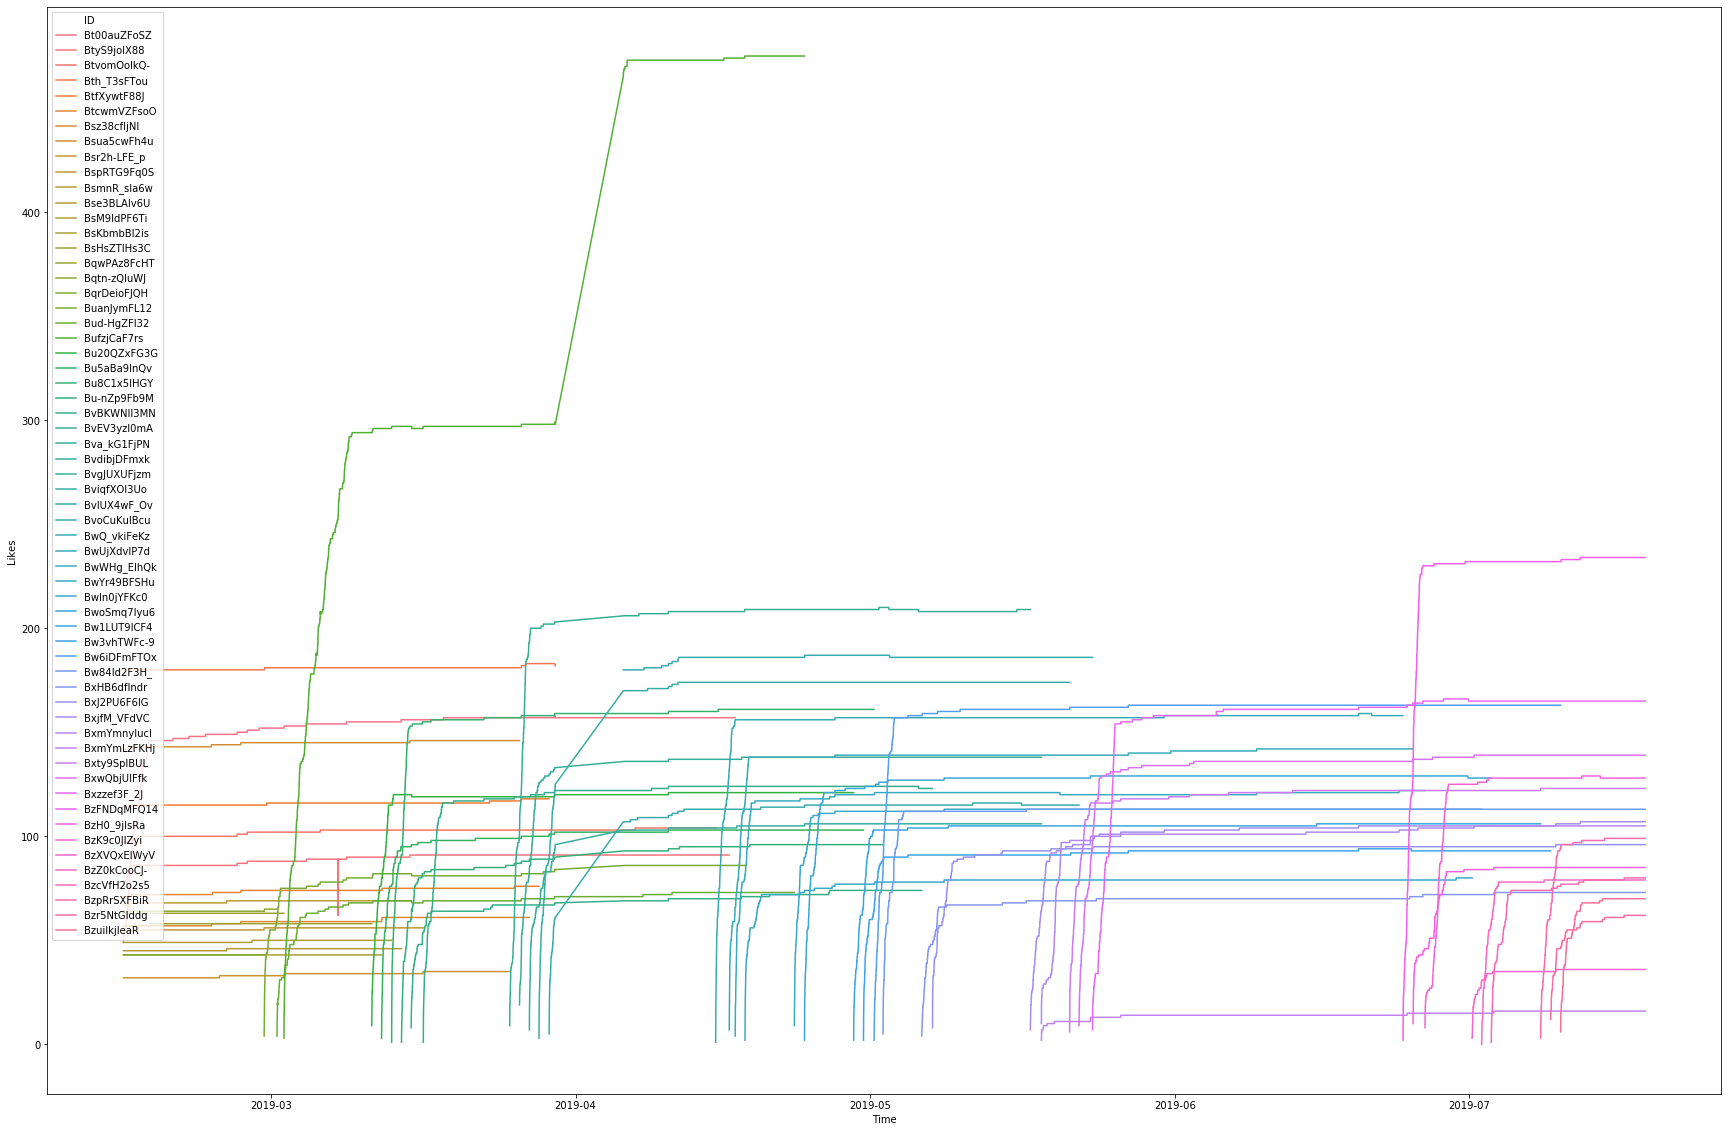

In [96]:
plt.figure(figsize=(30,20))
sns.lineplot(data=instagram, x='Time', y='Likes', hue='ID');

In [ ]:
get_rows = rows_choose(days=range(1,31))
inst_h_d = get_rows.transform(instagram) # do not use unless you have updated the data or you want to
                                         # get different timeshifts, it takes a lot of time to compute
with open('inst_h_d', 'wb') as save_pickle:
    pickle.dump(inst_h_d, save_pickle)

In [3]:
with open('inst_h_d', 'rb') as tmp_pickle: # line to load data frame with default time shifts
    inst_h_d = pickle.load(tmp_pickle)

In [98]:
inst_h_d.loc['1h'].head(5)

,Time,Likes,Comments,Followers,Char_in_desrc,Tags,First_app
ID,,,,,,,
BuanJymFL12,2019-02-28 07:45:00,24,1,122,1688,24,2019-02-28 06:45:00
Bud-HgZFl32,2019-03-01 15:00:00,17,0,123,1641,23,2019-03-01 14:00:00
BufzjCaF7rs,2019-03-02 08:05:00,20,0,126,506,18,2019-03-02 07:05:00
Bu20QZxFG3G,2019-03-11 06:35:00,25,1,126,478,25,2019-03-11 05:35:00
Bu5aBa9lnQv,2019-03-12 06:45:00,20,2,127,423,25,2019-03-12 05:45:00


In [5]:
dividing_point = (4, 7, 10, 16)
# default pipeline, it adds two columns - hours of first appereance as integers (it first rounds
# that time to full hours) and intervals of the time of first appereance
inst_h_d_pipe = Pipeline([('hours_to_int', get_hours()),
                          ('hours_intervals', hours_interval(dividing_points=dividing_point))])
inst_h_d_to_use = inst_h_d_pipe.fit_transform(inst_h_d)
inst_h_d_to_use.loc['1h']

,Time,Likes,Comments,Followers,Char_in_desrc,Tags,First_app,Int_hour,Time_intervals
ID,,,,,,,,,
BuanJymFL12,2019-02-28 07:45:00,24,1,122,1688,24,2019-02-28 06:45:00,7,4-7
Bud-HgZFl32,2019-03-01 15:00:00,17,0,123,1641,23,2019-03-01 14:00:00,14,10-16
BufzjCaF7rs,2019-03-02 08:05:00,20,0,126,506,18,2019-03-02 07:05:00,7,7-10
Bu20QZxFG3G,2019-03-11 06:35:00,25,1,126,478,25,2019-03-11 05:35:00,6,4-7
Bu5aBa9lnQv,2019-03-12 06:45:00,20,2,127,423,25,2019-03-12 05:45:00,6,4-7
Bu8C1x5lHGY,2019-03-13 07:20:00,35,0,131,412,25,2019-03-13 06:20:00,6,4-7
Bu-nZp9Fb9M,2019-03-14 07:20:00,11,1,136,477,25,2019-03-14 06:20:00,6,4-7
BvBKWNll3MN,2019-03-15 07:00:00,19,0,135,317,25,2019-03-15 06:00:00,6,4-7
BvEV3yzl0mA,2019-03-16 12:40:00,21,0,136,317,25,2019-03-16 11:40:00,12,10-16


## Plots

In [6]:
my_order = create_time_intervals(dividing_point)
time_shift_h_list = ['%sh' %num for num in range(1,24,1)]
hours_names = ['1 hour']
hours_names.extend(['%s hours' %num for num in range(2,24,1)])
time_shift_d_list = ['%sd' %num for num in range(1,31,1)]
days_names = ['1 day']
days_names.extend(['%s days' %num for num in range(2,31,1)])

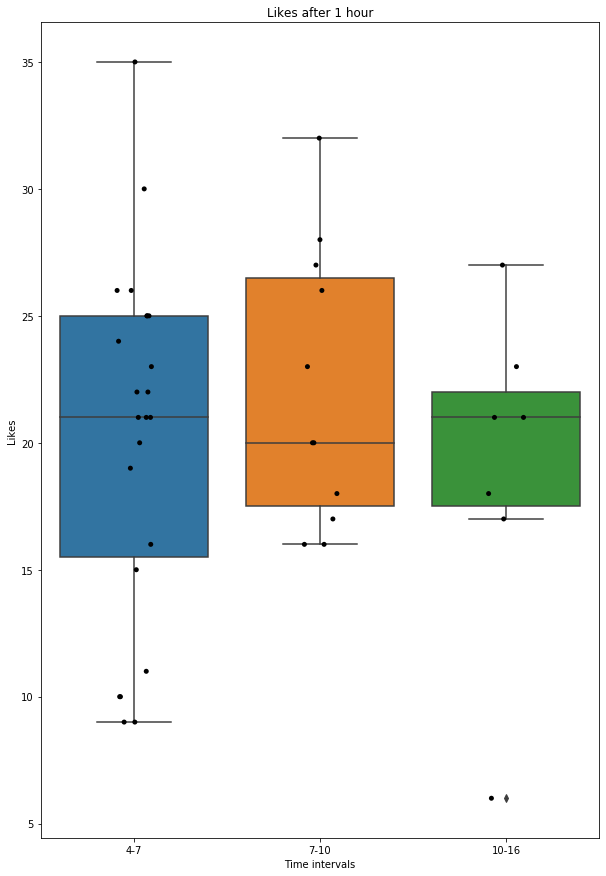

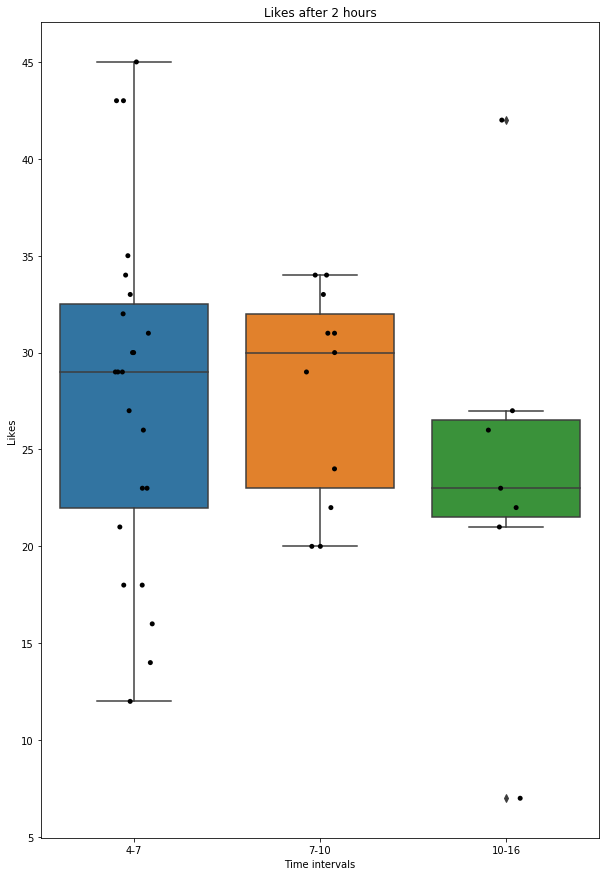

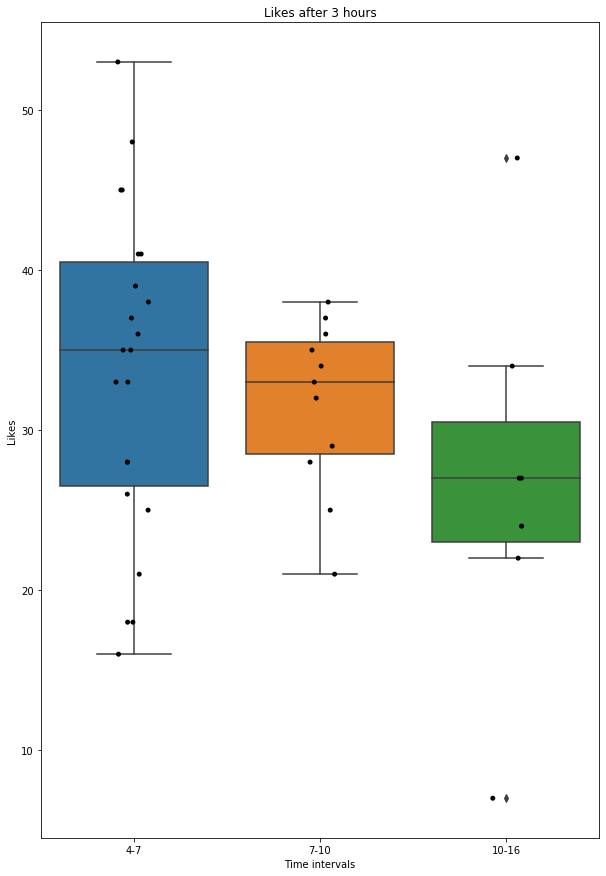

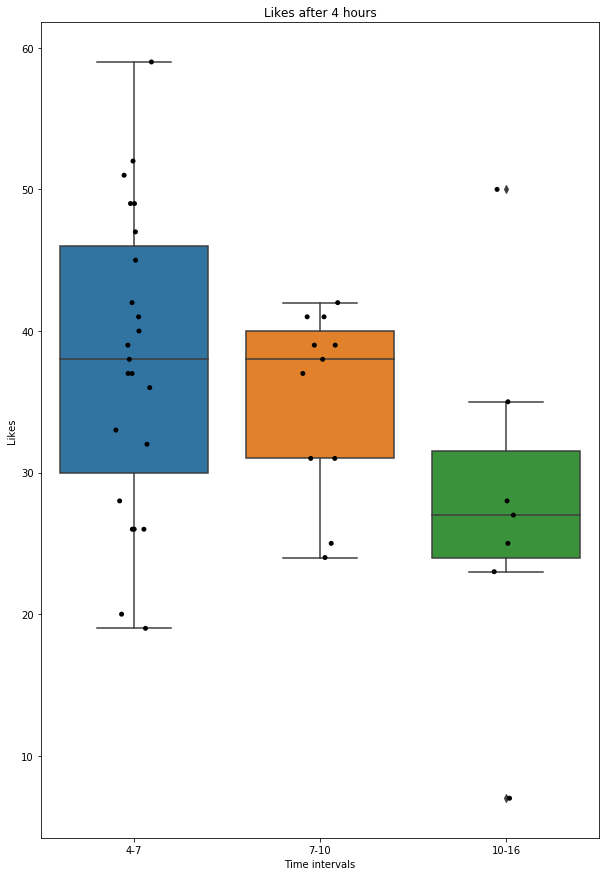

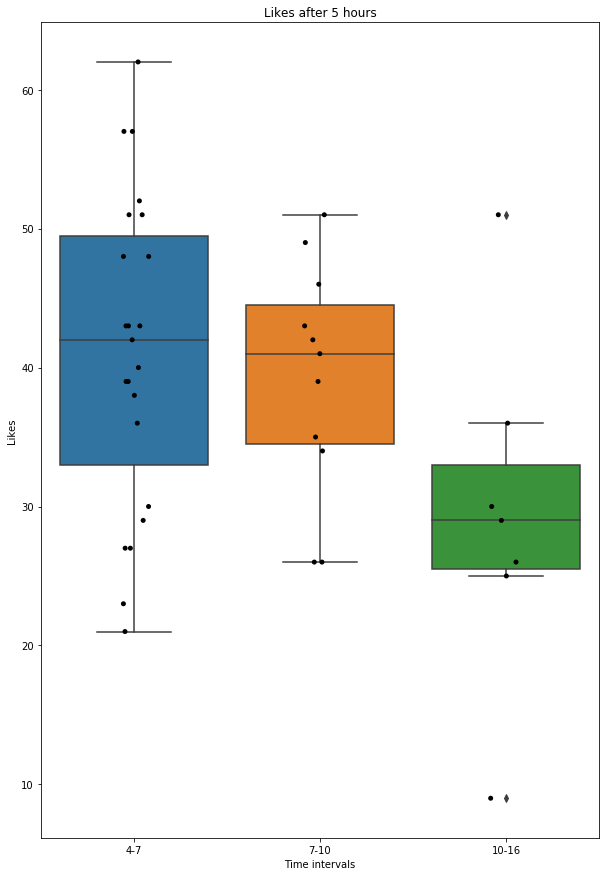

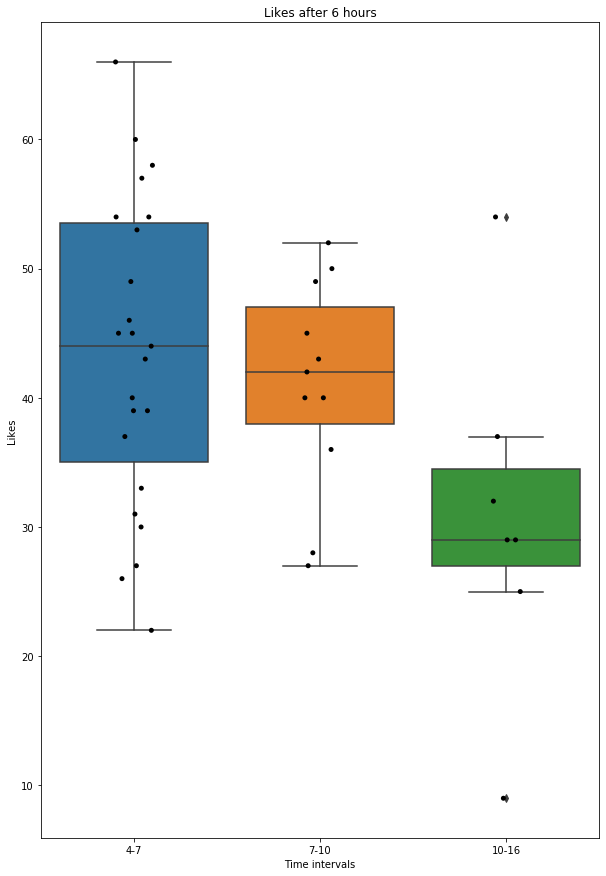

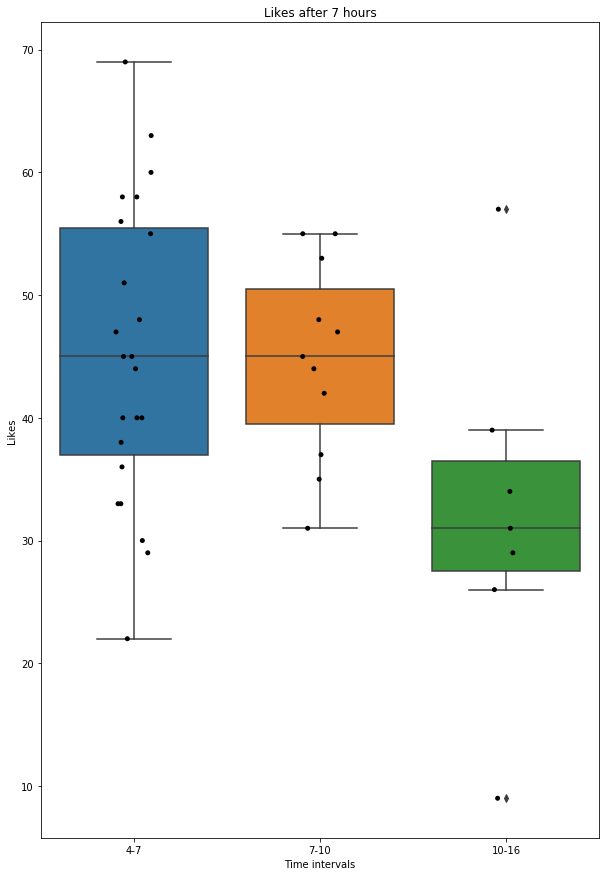

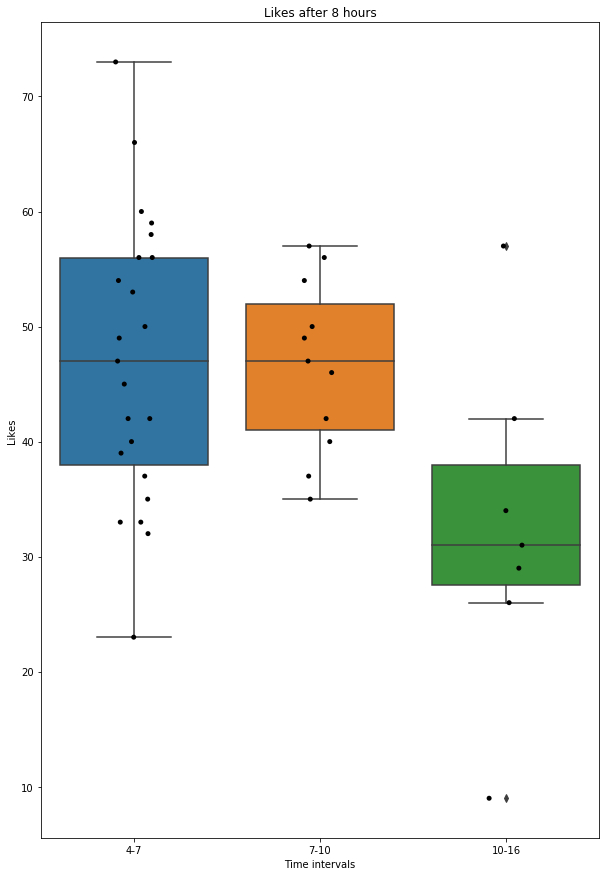

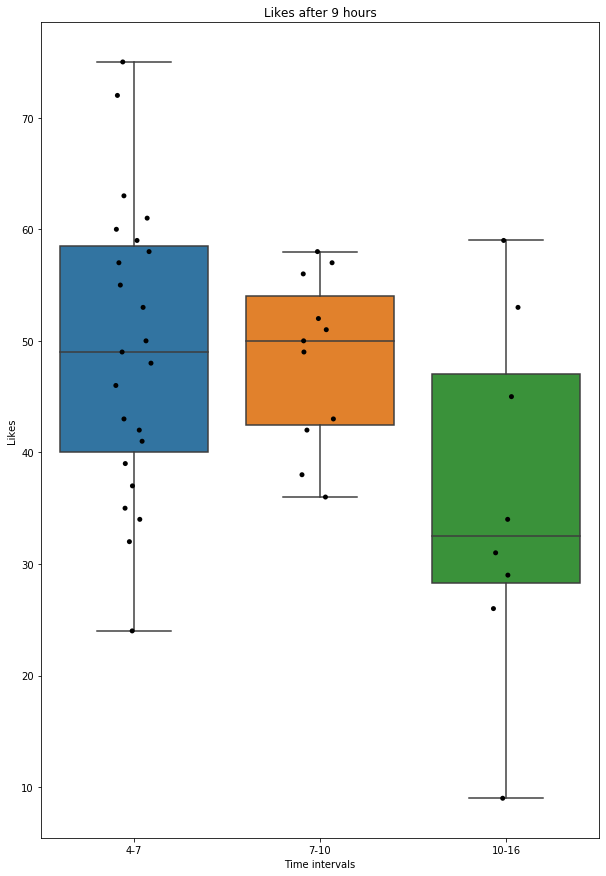

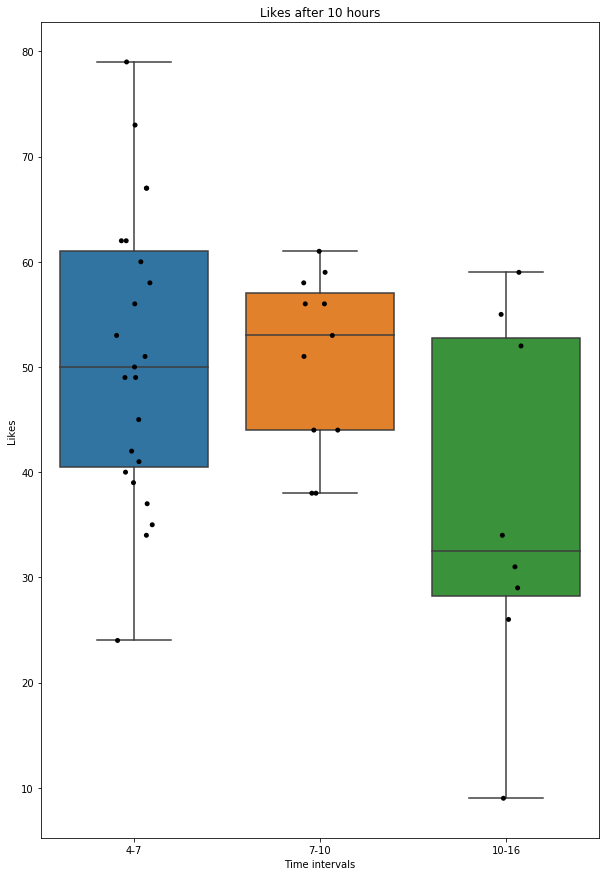

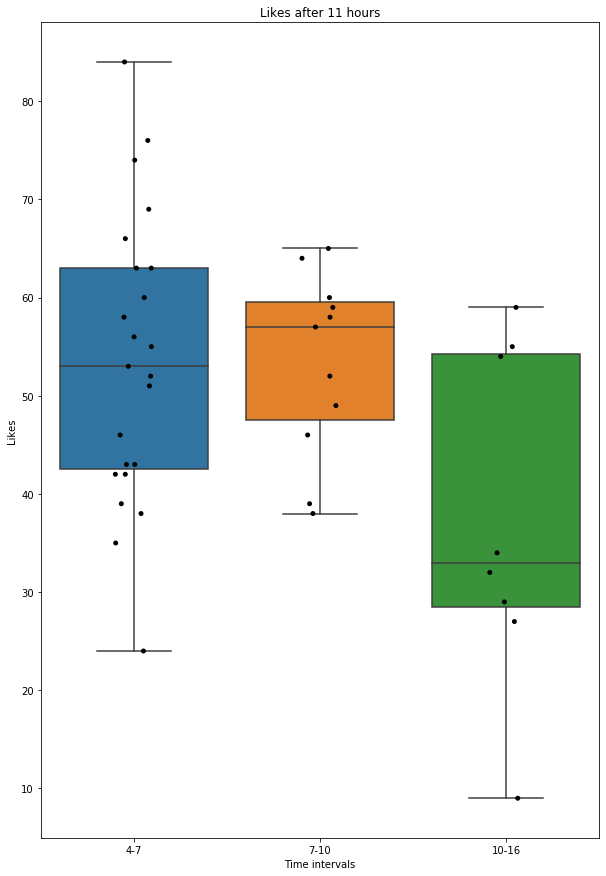

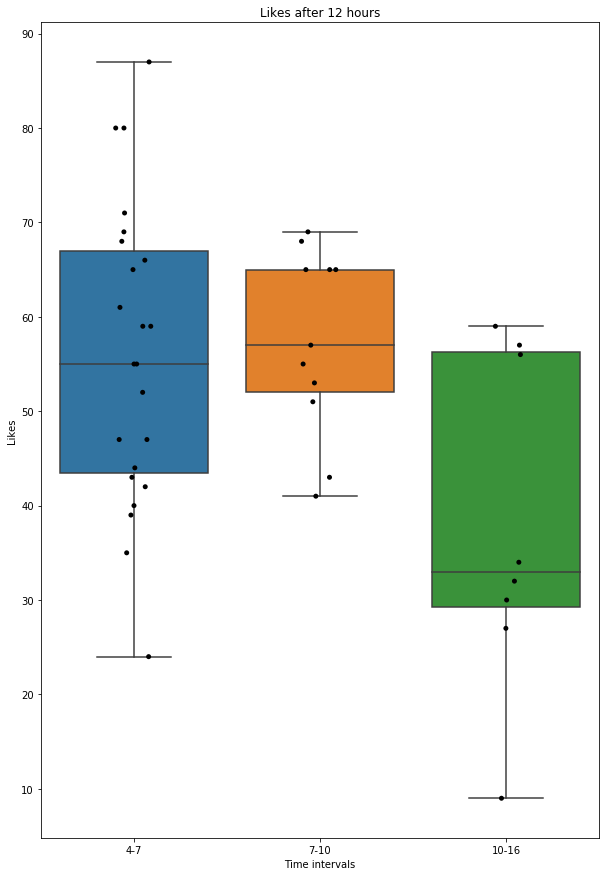

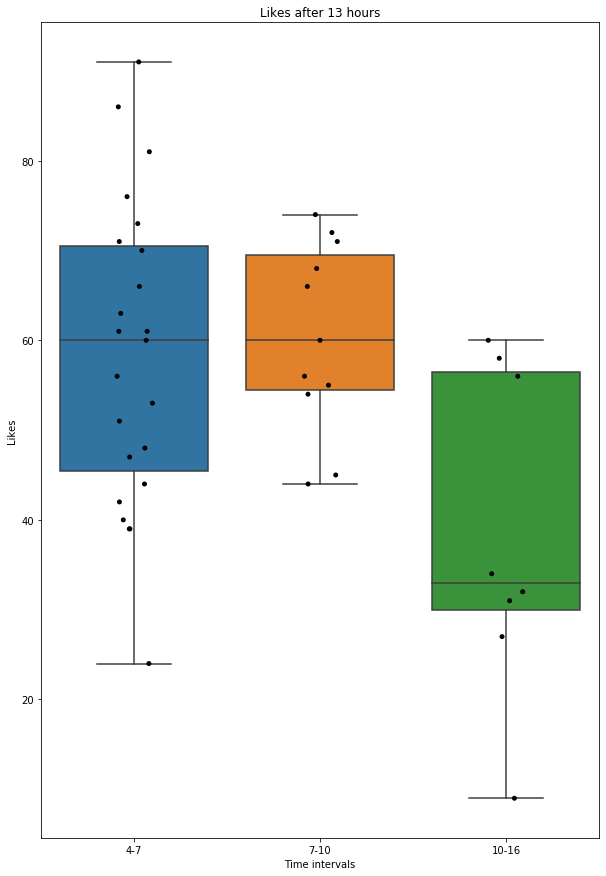

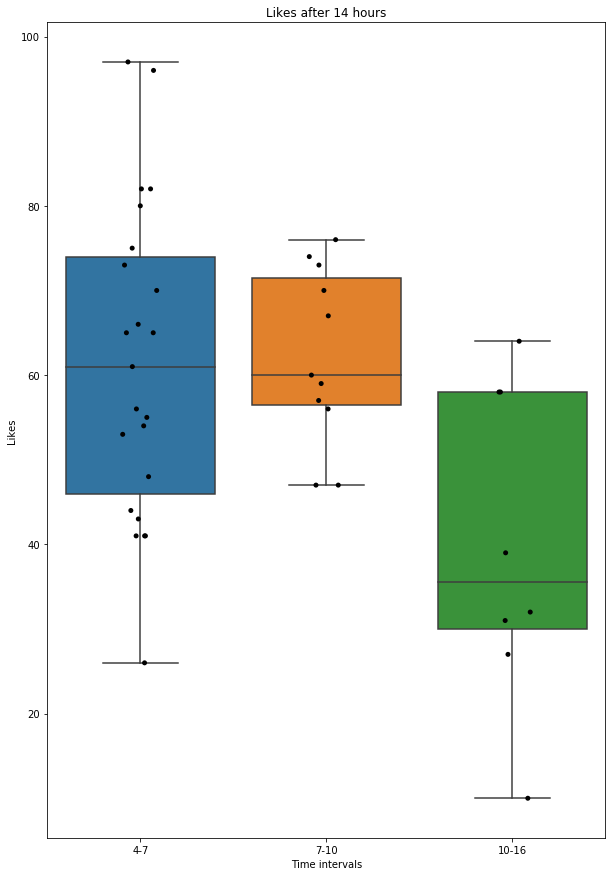

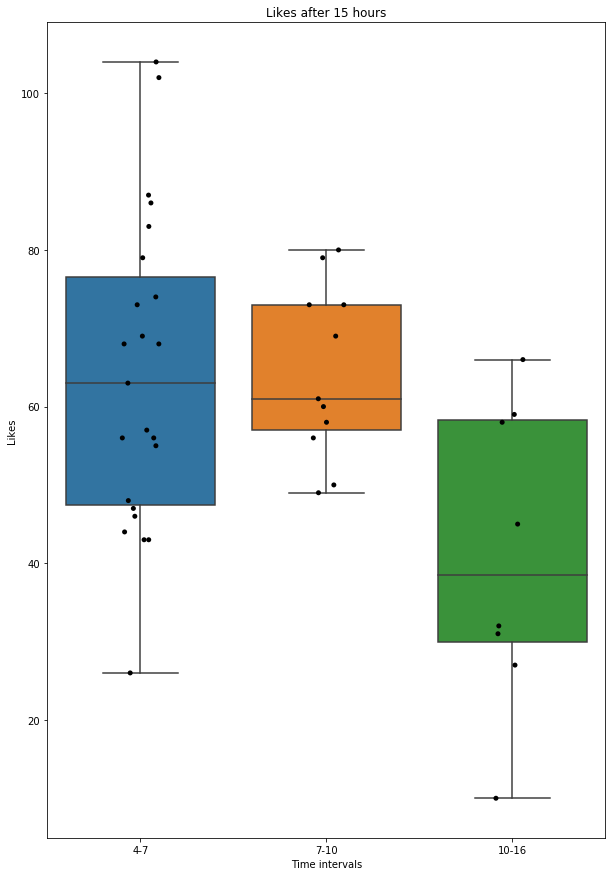

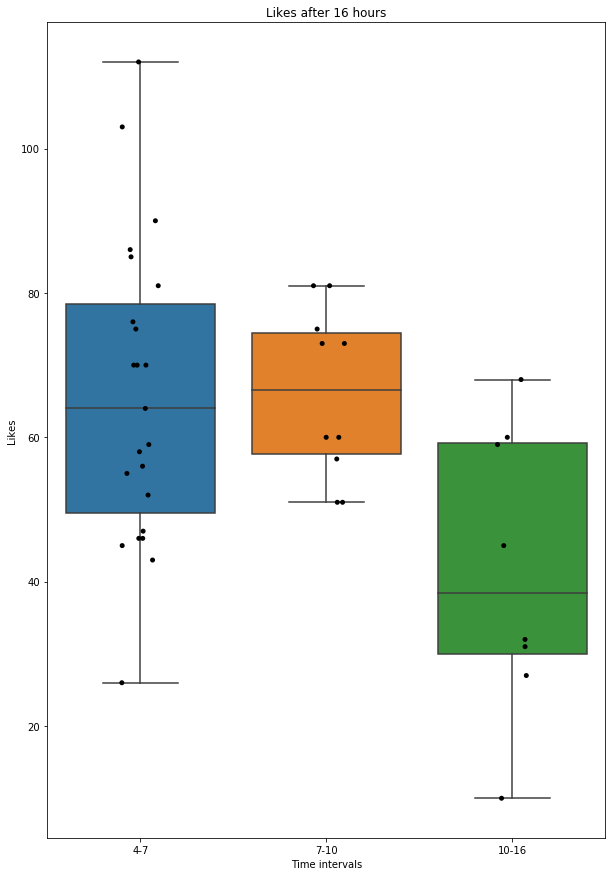

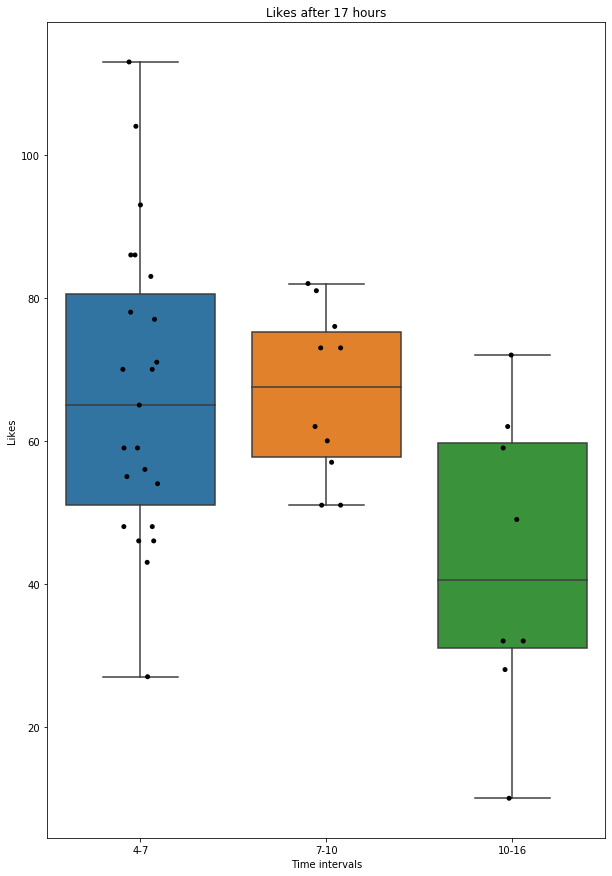

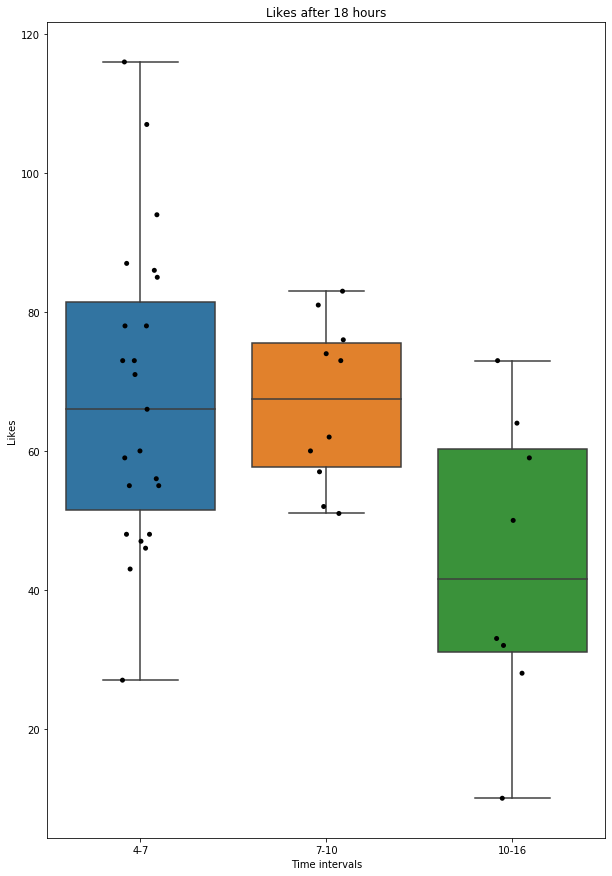

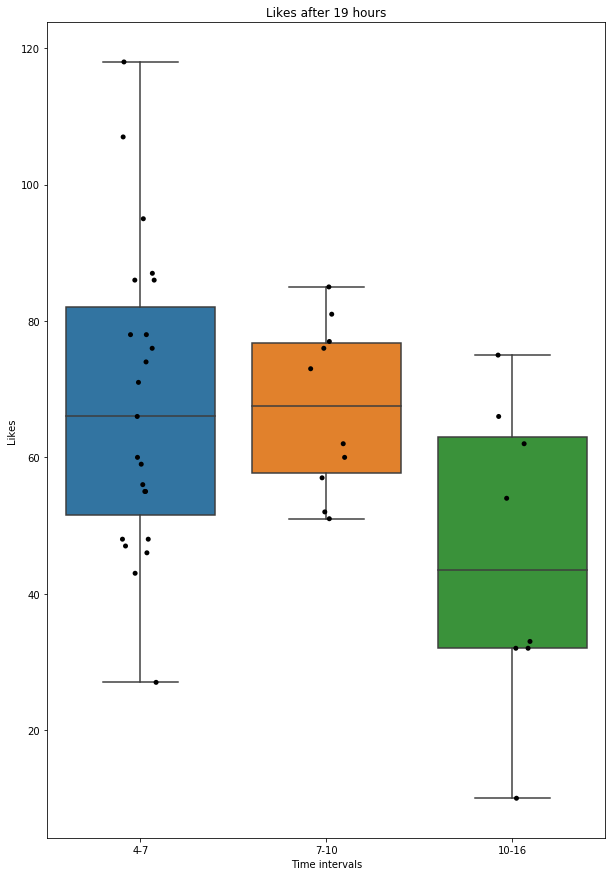

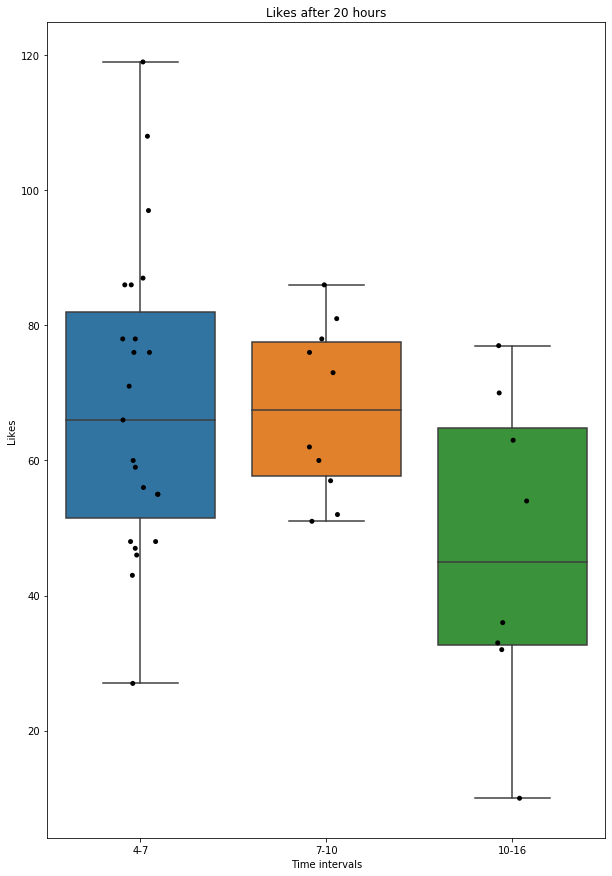

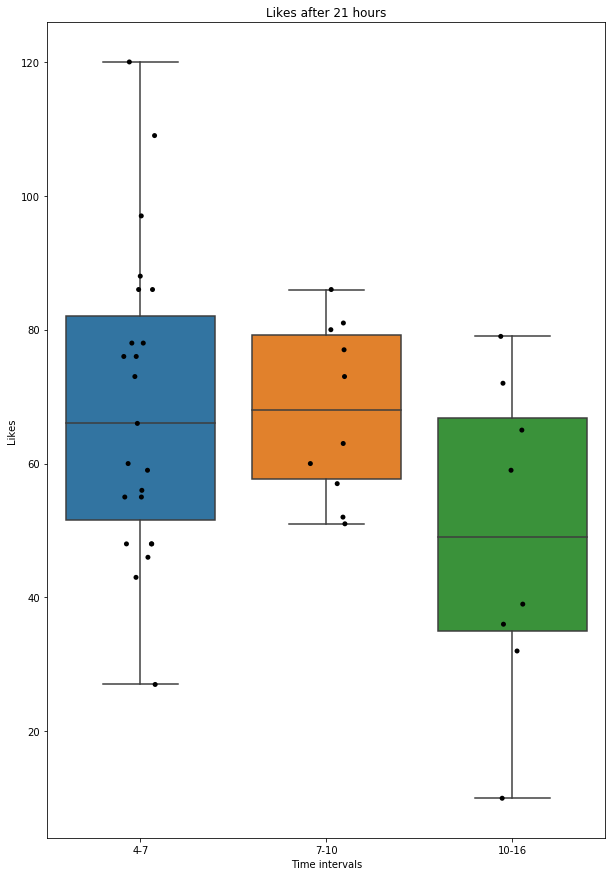

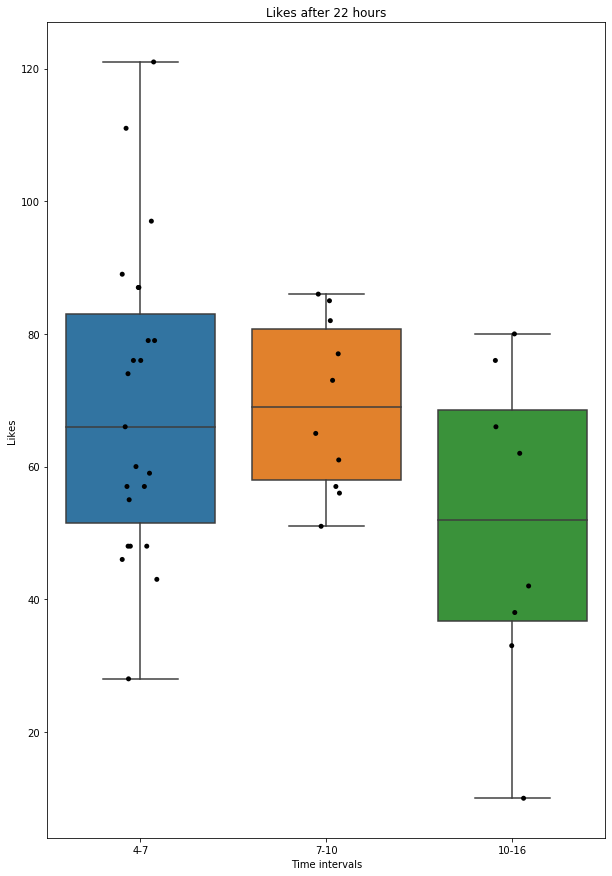

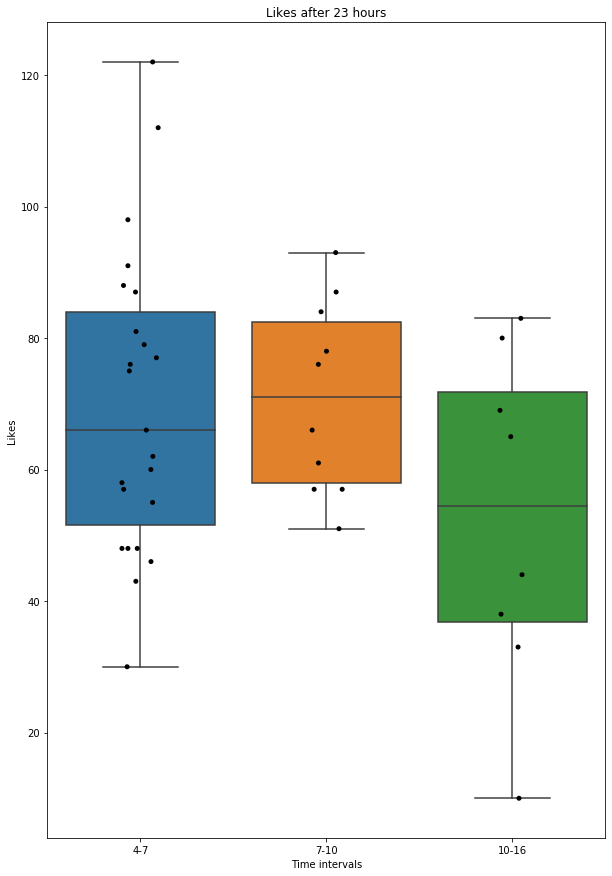

In [101]:
for time_shift, m_hours in zip(time_shift_h_list, hours_names):
    plt.figure(figsize=(10,15))
    sns.boxplot(x="Time_intervals", y="Likes", data=inst_h_d_to_use.loc[time_shift],  order=my_order)
    sns.stripplot(x="Time_intervals", y="Likes", data=inst_h_d_to_use.loc[time_shift], jitter=True,
                  color='black', order=my_order).set(title='Likes after '+m_hours, xlabel='Time intervals')
        

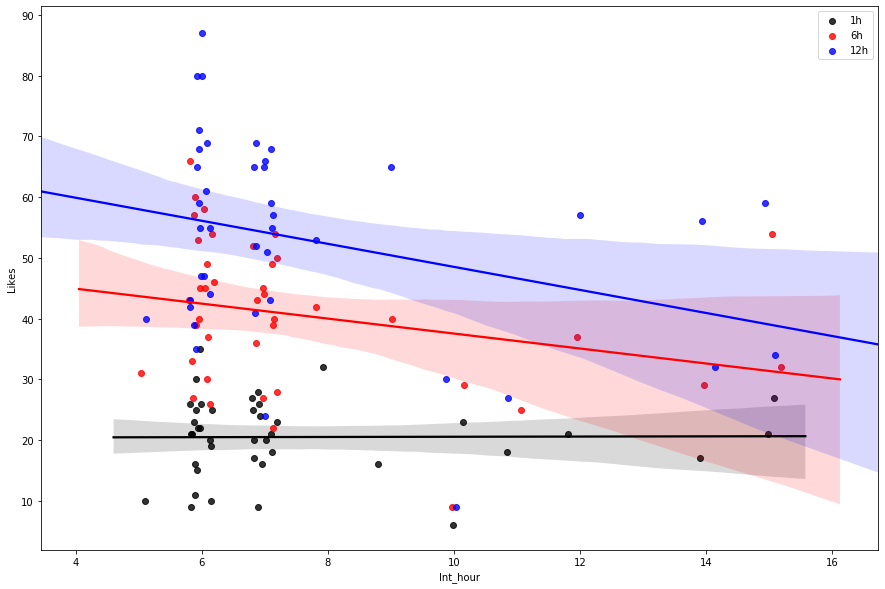

In [102]:
plt.figure(figsize=(15, 10))
sns.regplot(x='Int_hour', y='Likes', data=inst_h_d_to_use.loc['1h'], color='black', label='1h', x_jitter=0.2, fit_reg=True)
sns.regplot(x='Int_hour', y='Likes', data=inst_h_d_to_use.loc['6h'], color='red', label='6h', x_jitter=0.2,fit_reg=True)
sns.regplot(x='Int_hour', y='Likes', data=inst_h_d_to_use.loc['12h'], color='blue', label='12h', x_jitter=0.2, fit_reg=True)
plt.legend();

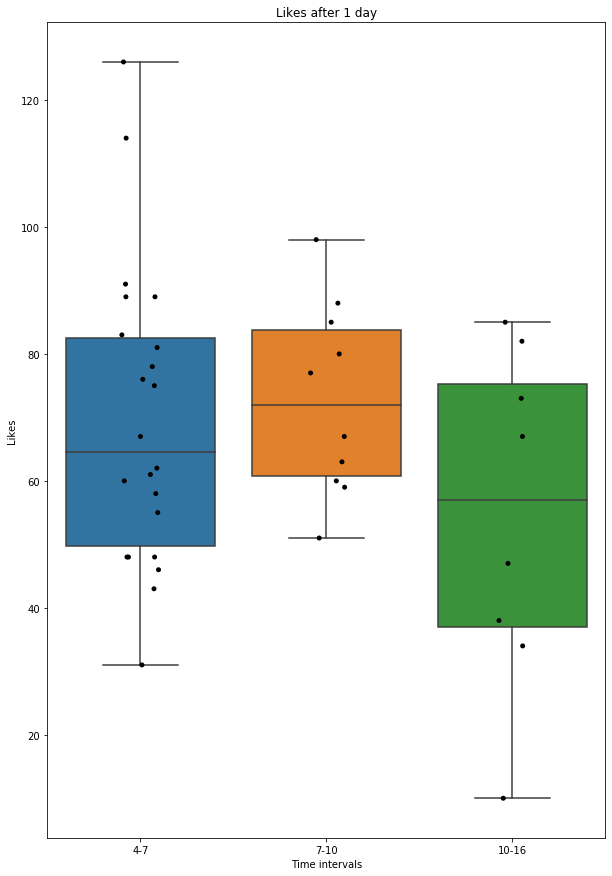

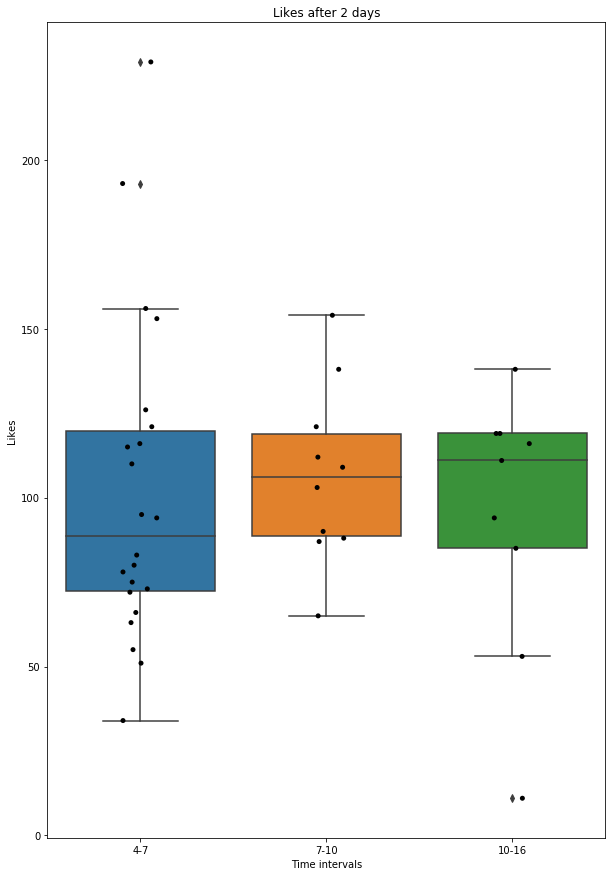

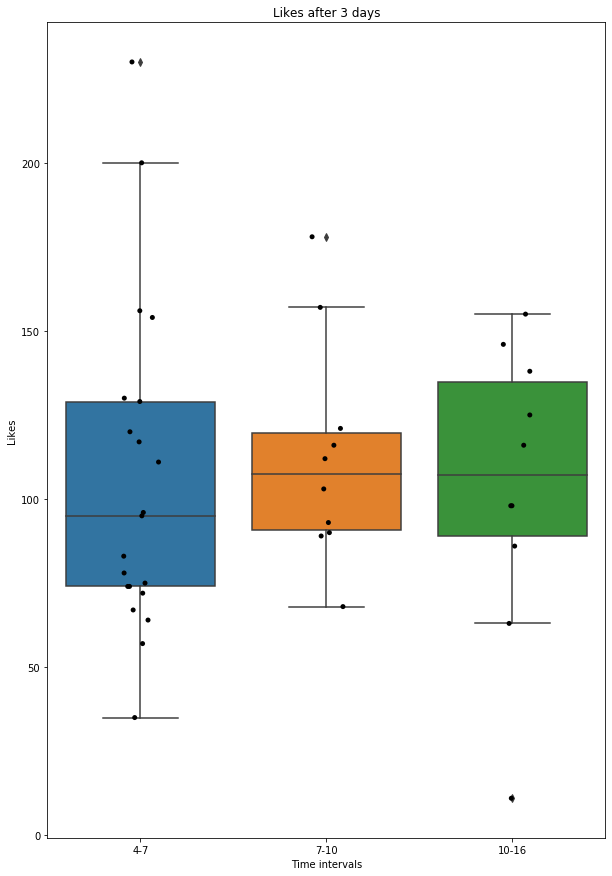

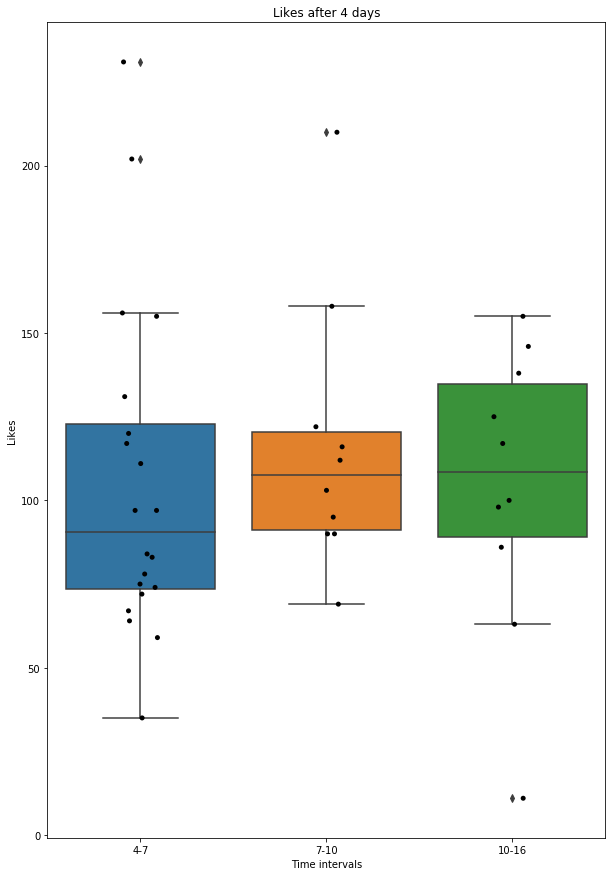

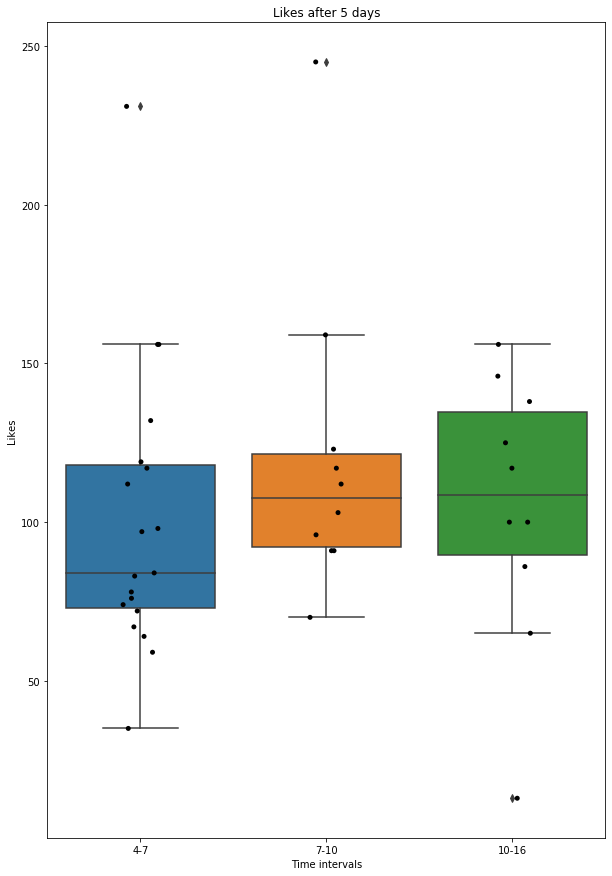

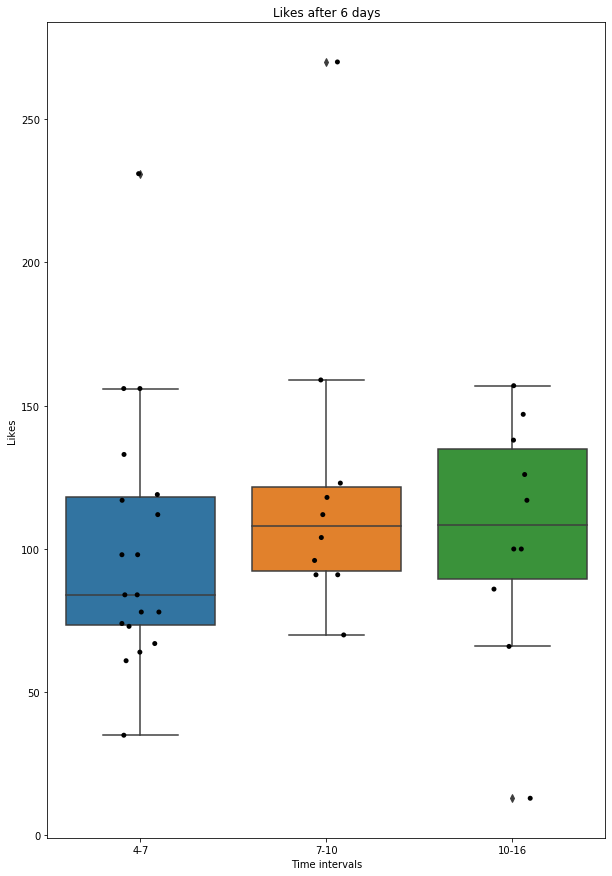

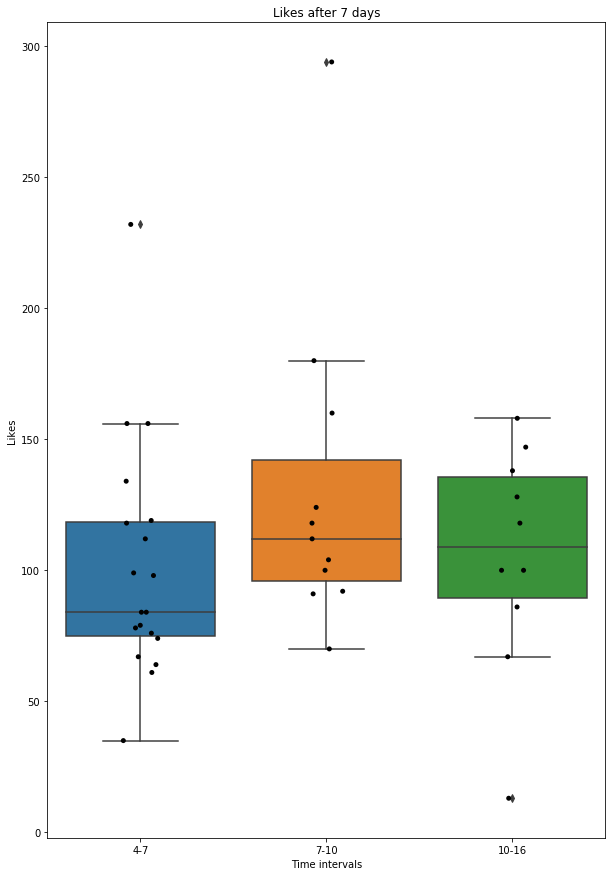

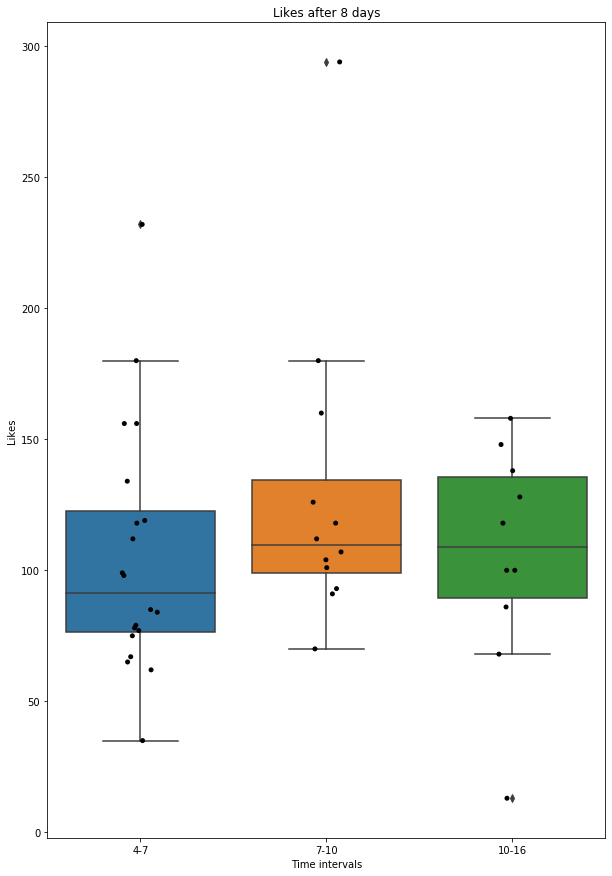

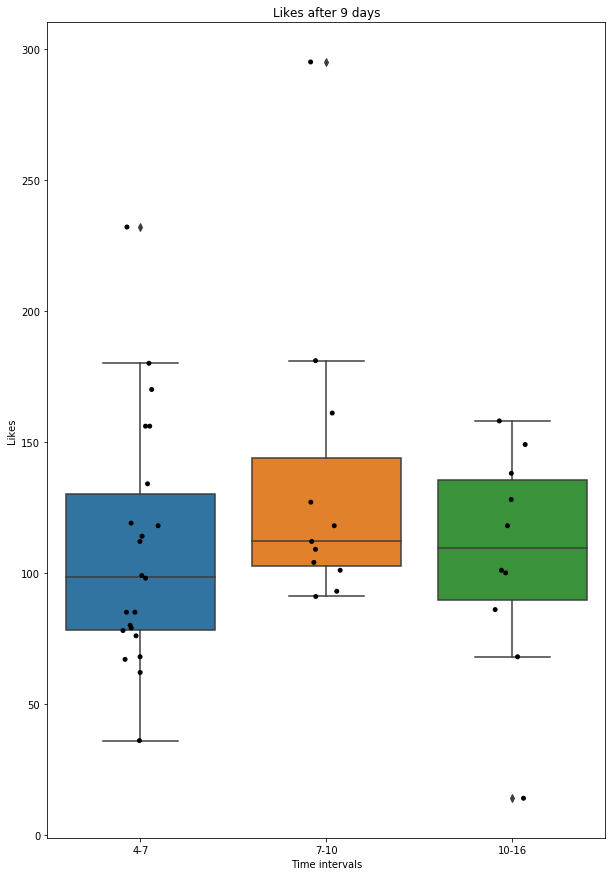

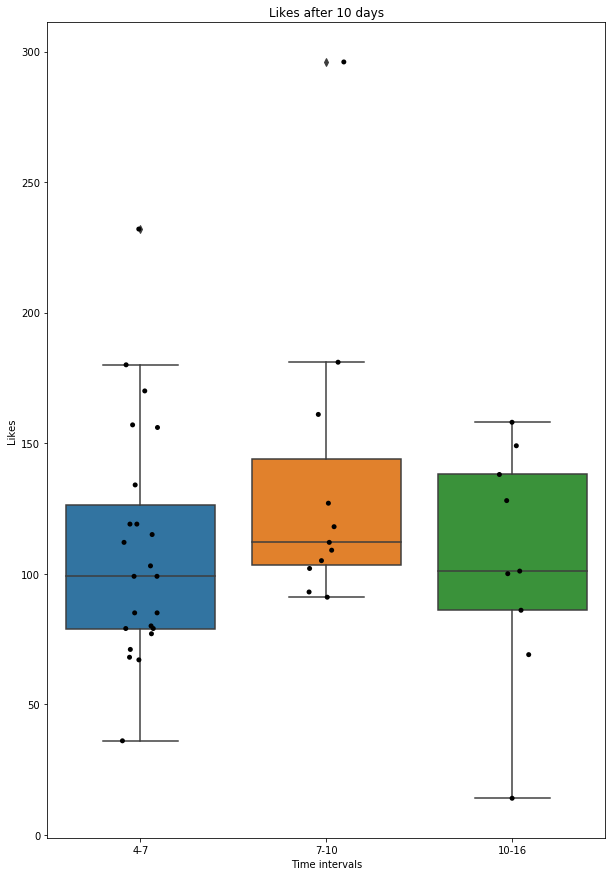

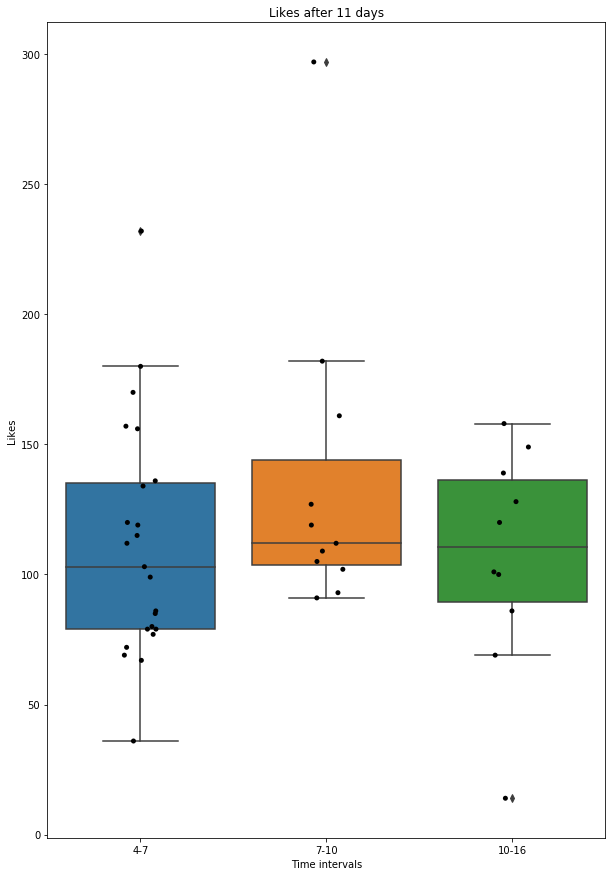

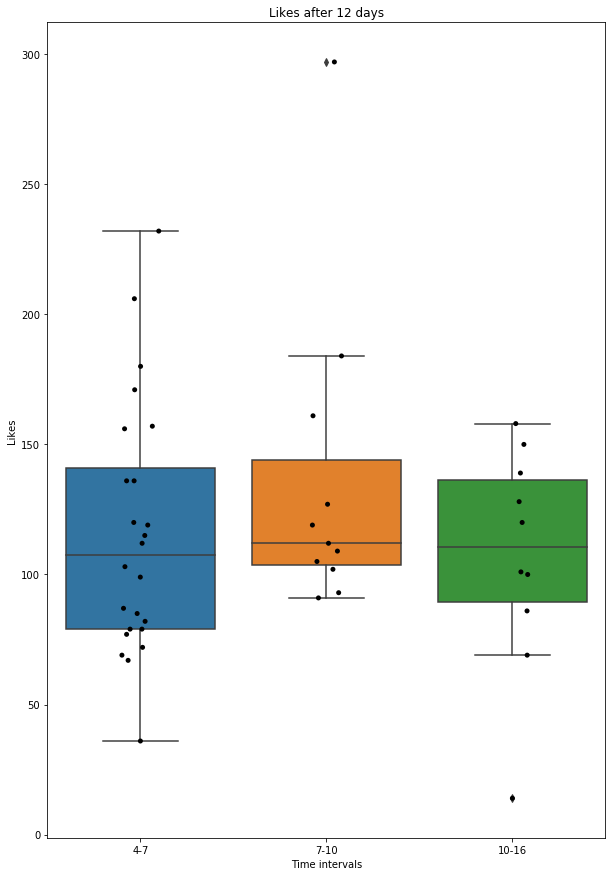

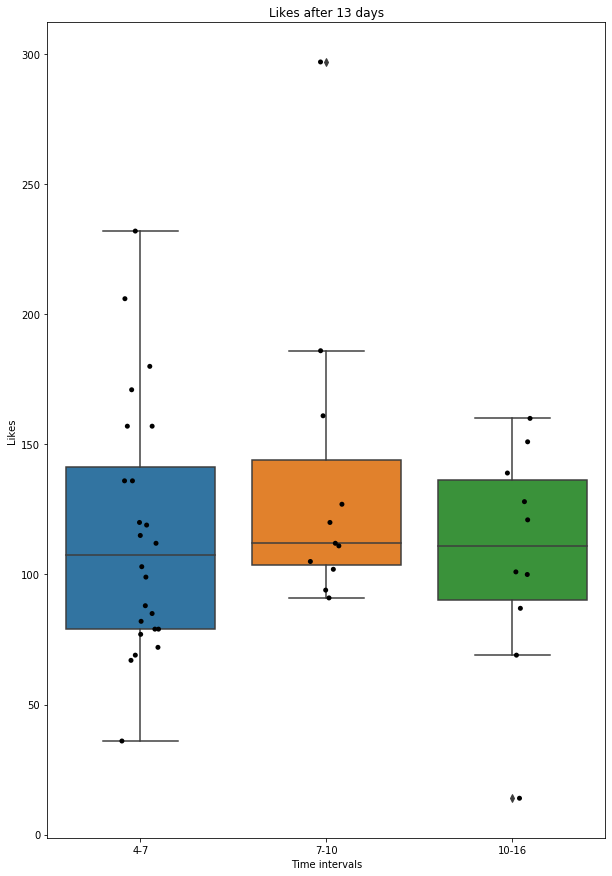

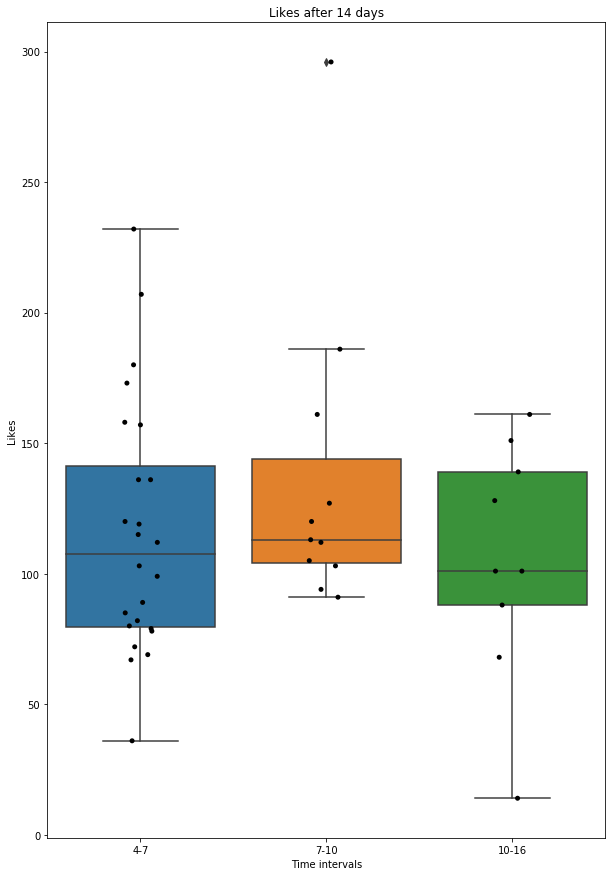

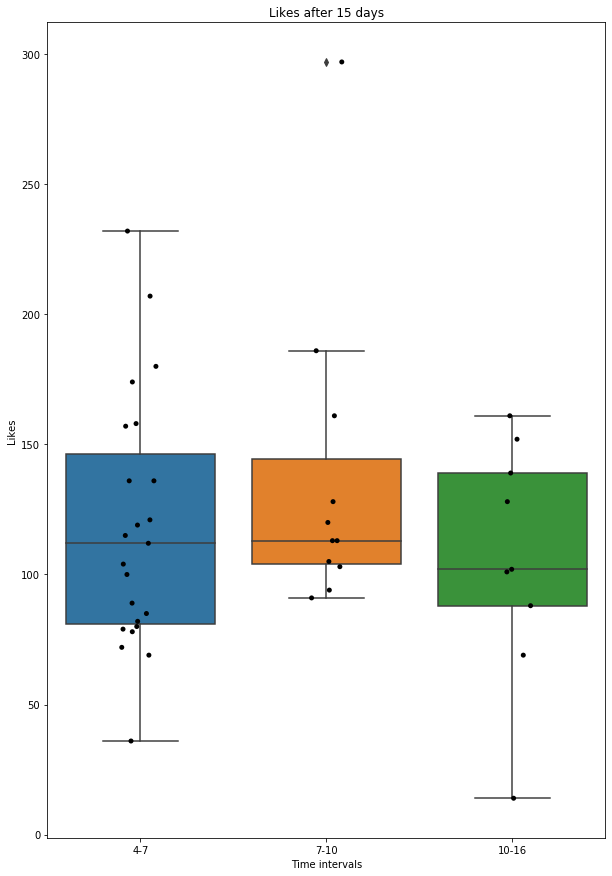

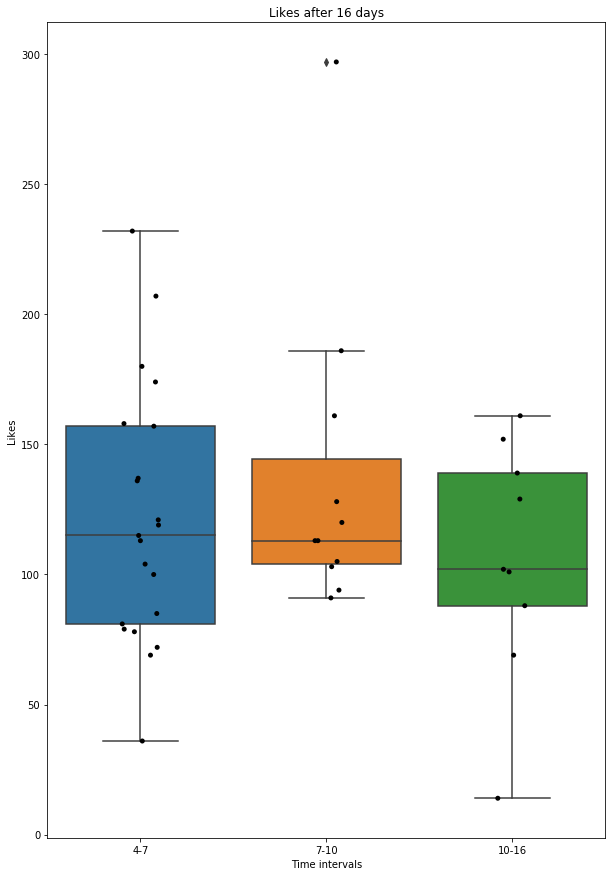

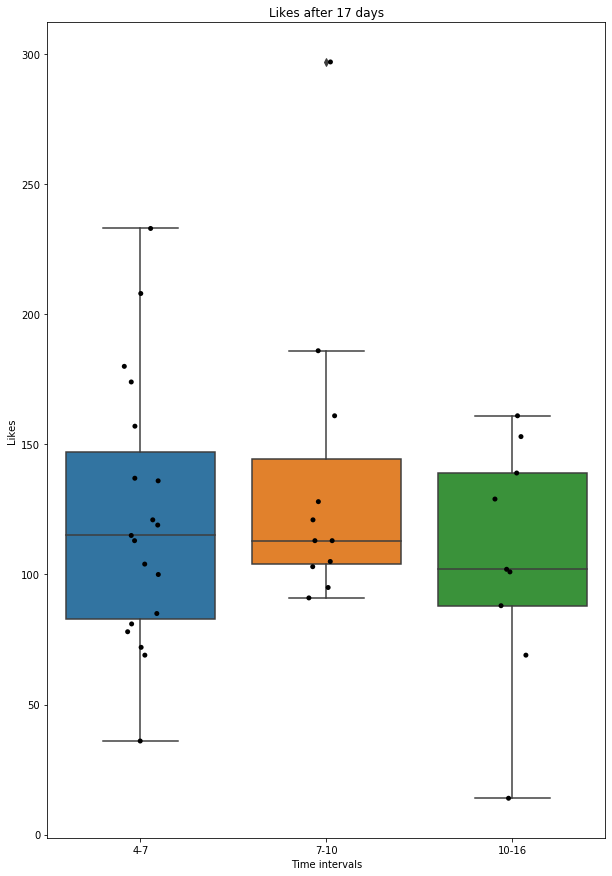

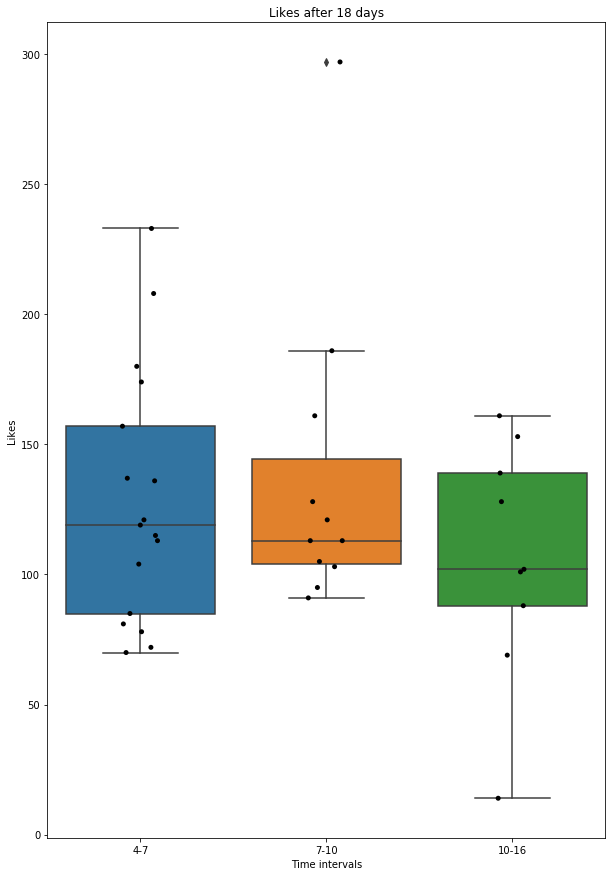

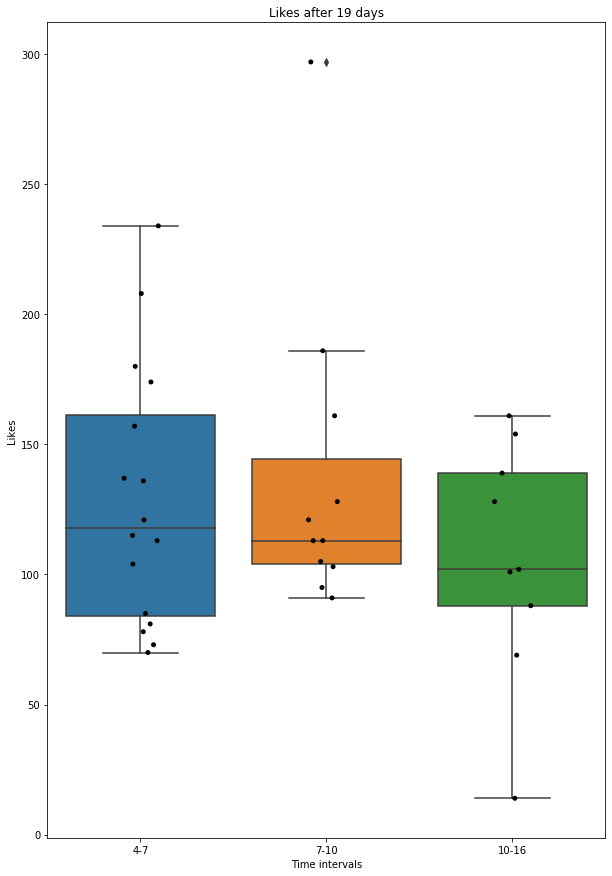

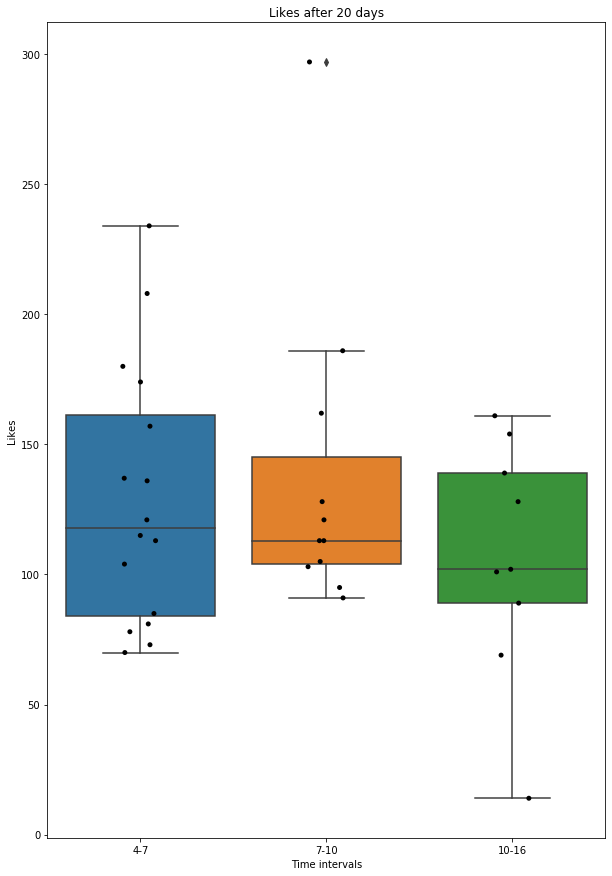

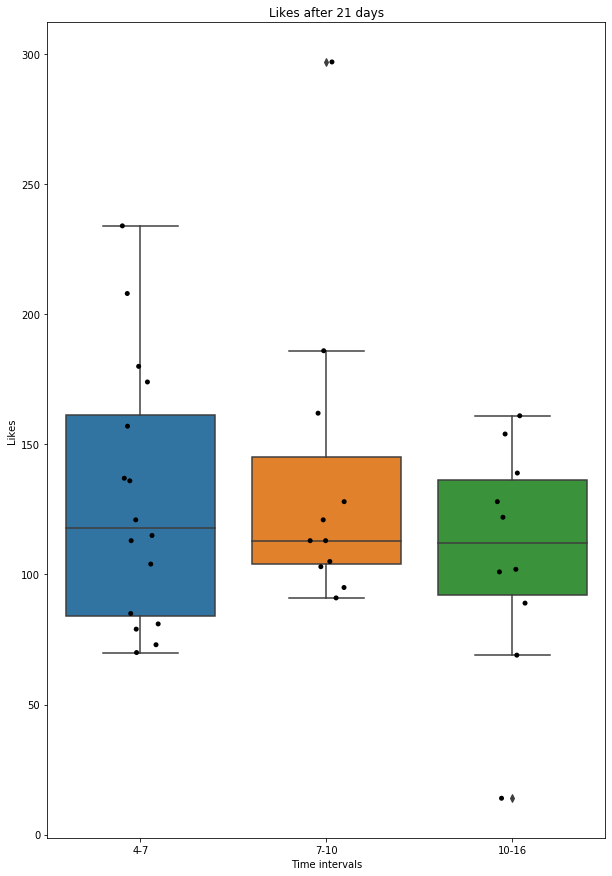

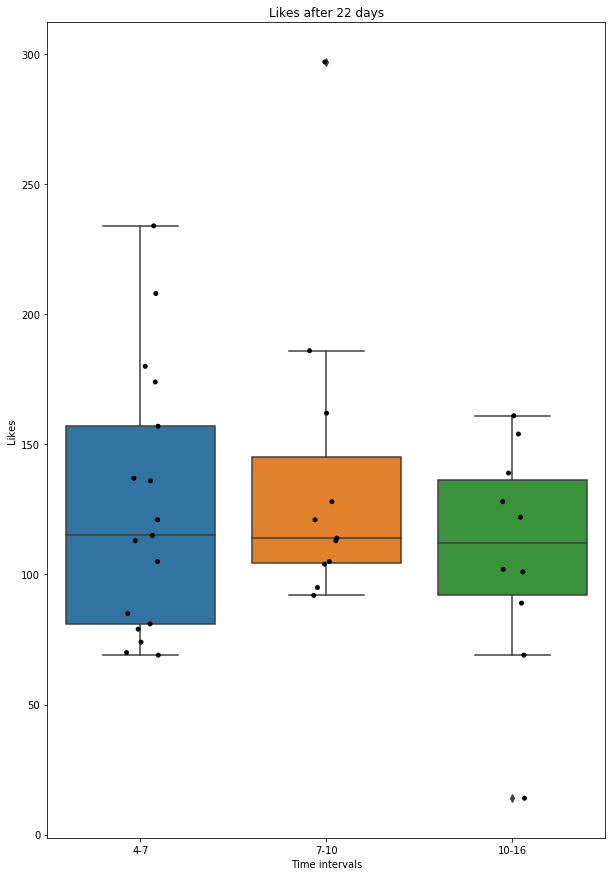

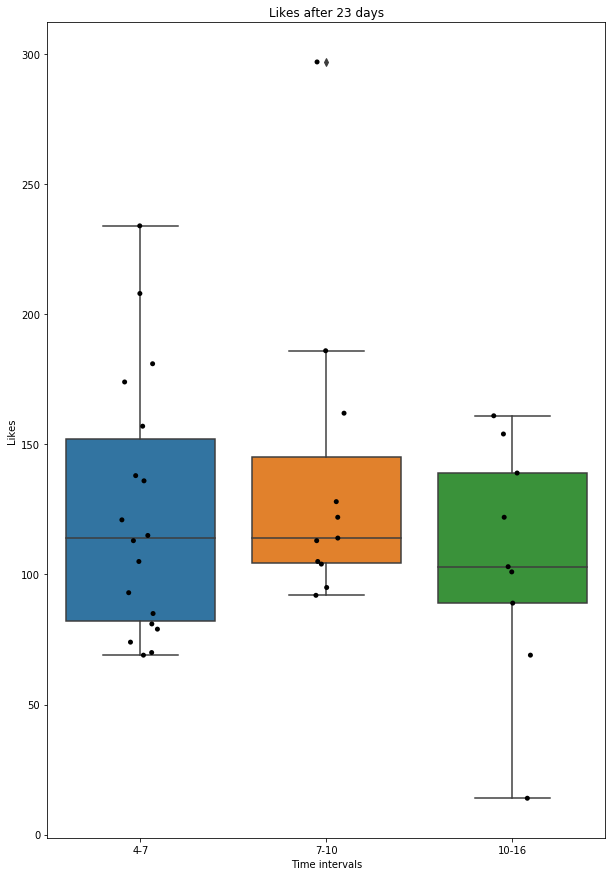

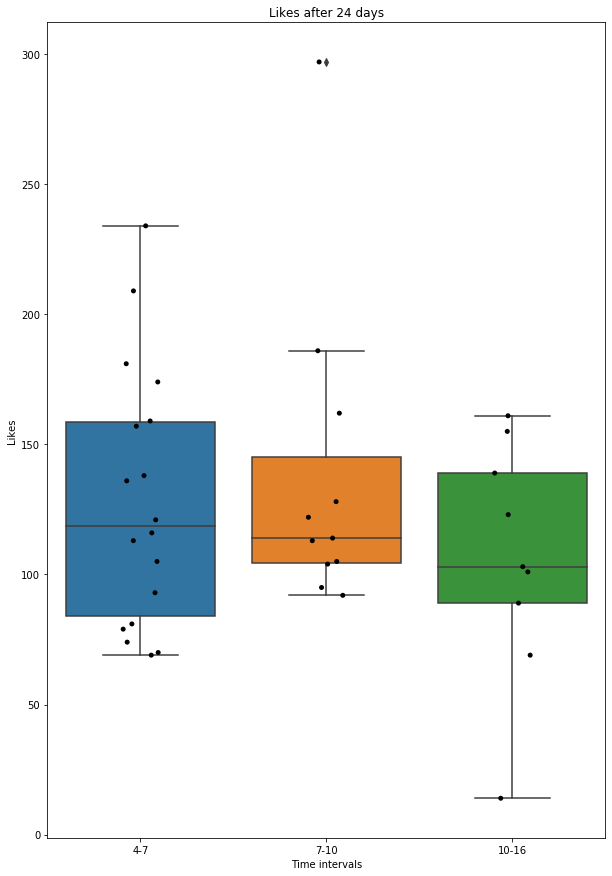

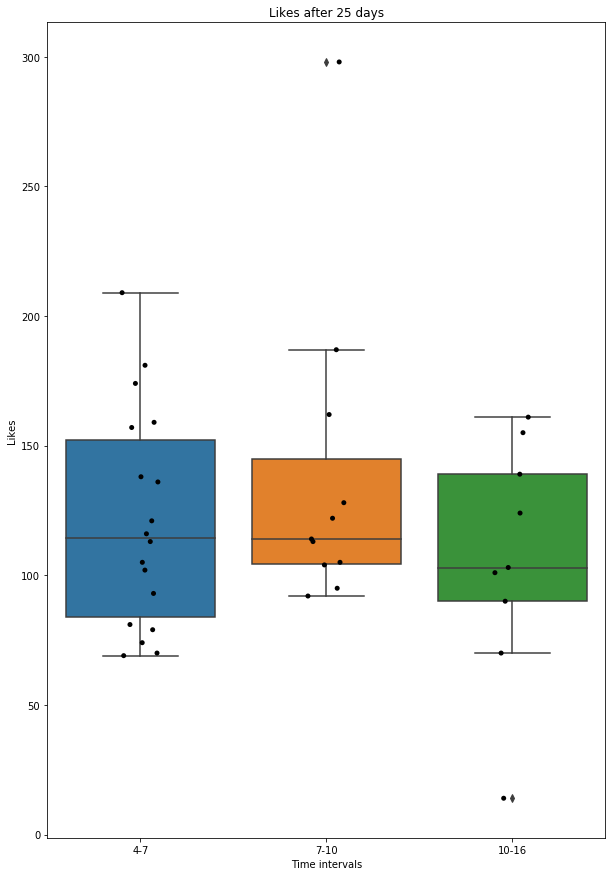

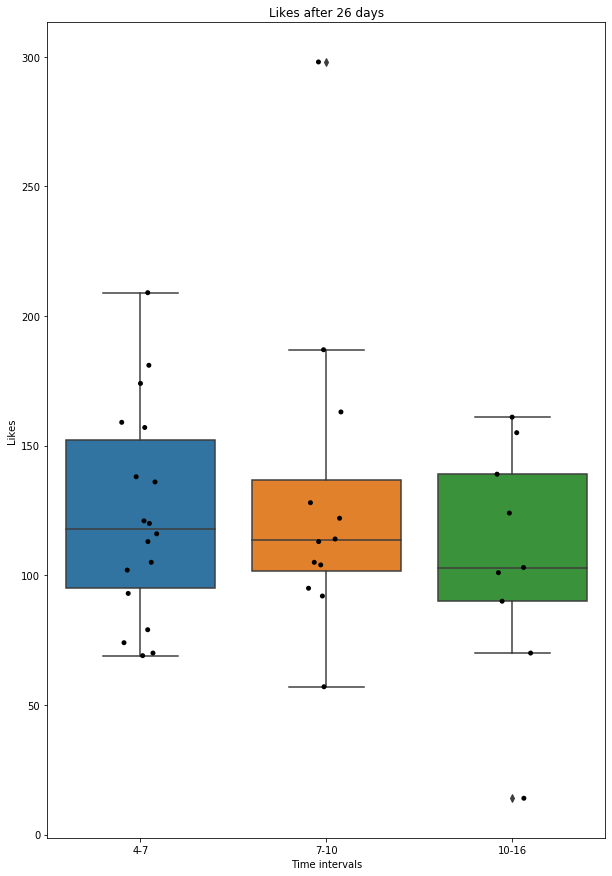

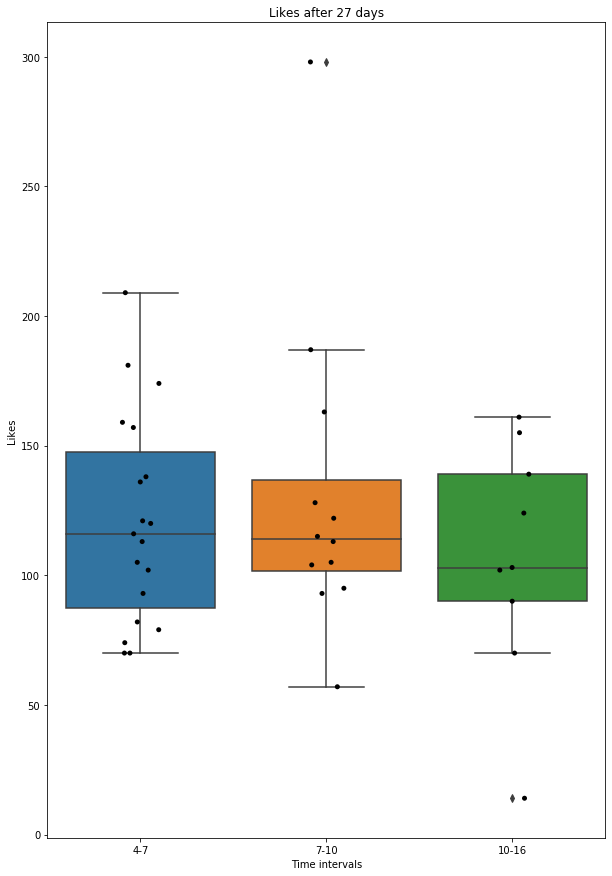

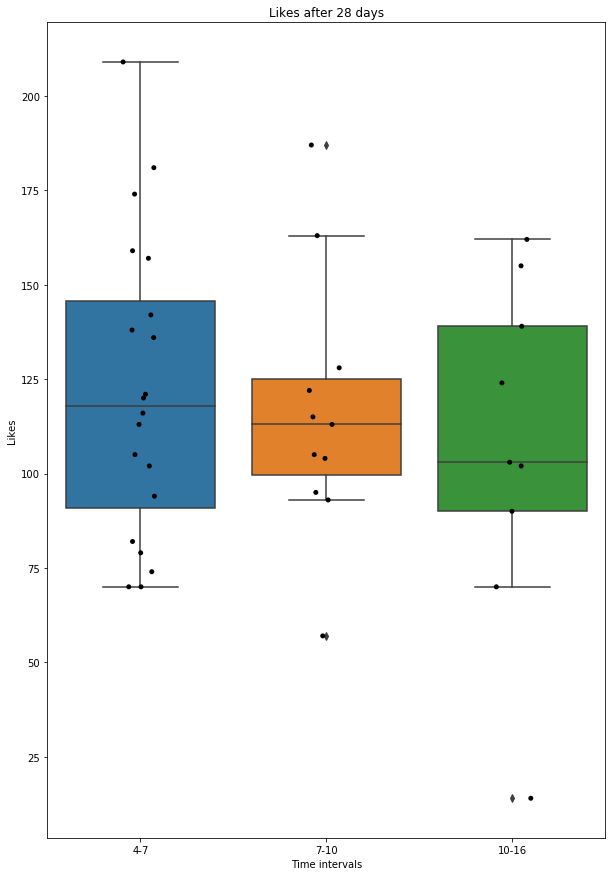

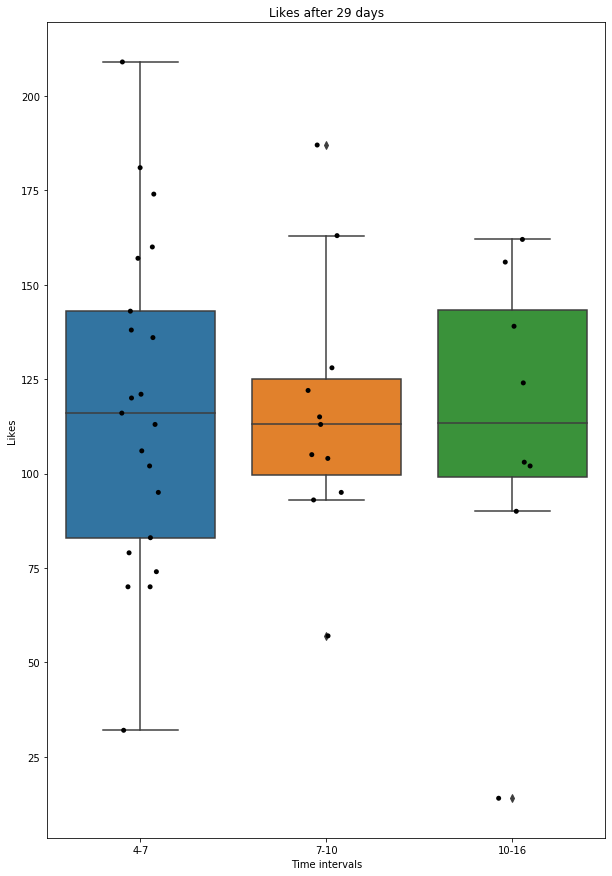

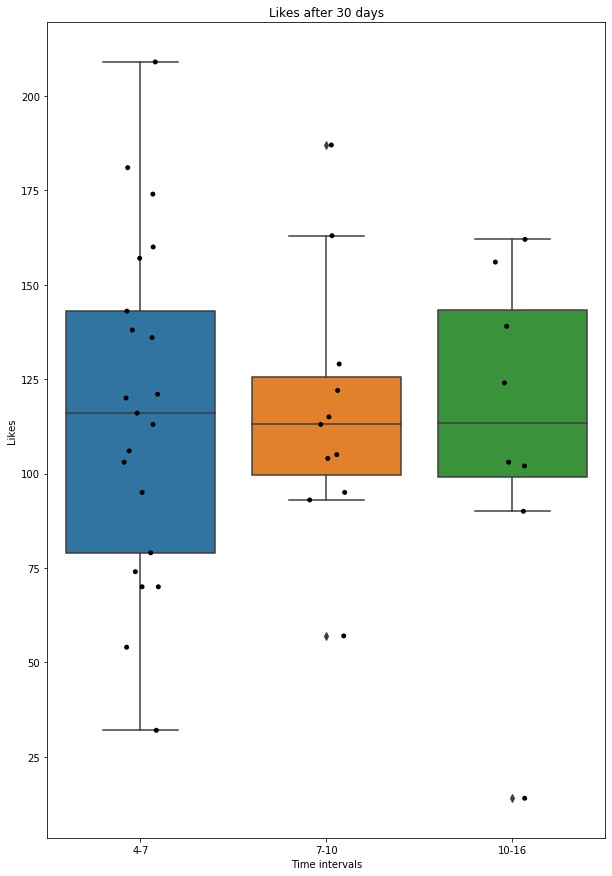

In [103]:
for time_shift, m_day in zip(time_shift_d_list, days_names):
    plt.figure(figsize=(10,15))
    sns.boxplot(x="Time_intervals", y="Likes", data=inst_h_d_to_use.loc[time_shift],  order=my_order)
    sns.stripplot(x="Time_intervals", y="Likes", data=inst_h_d_to_use.loc[time_shift], jitter=True,
                  color='black', order=my_order).set(title='Likes after '+m_day, xlabel='Time intervals')

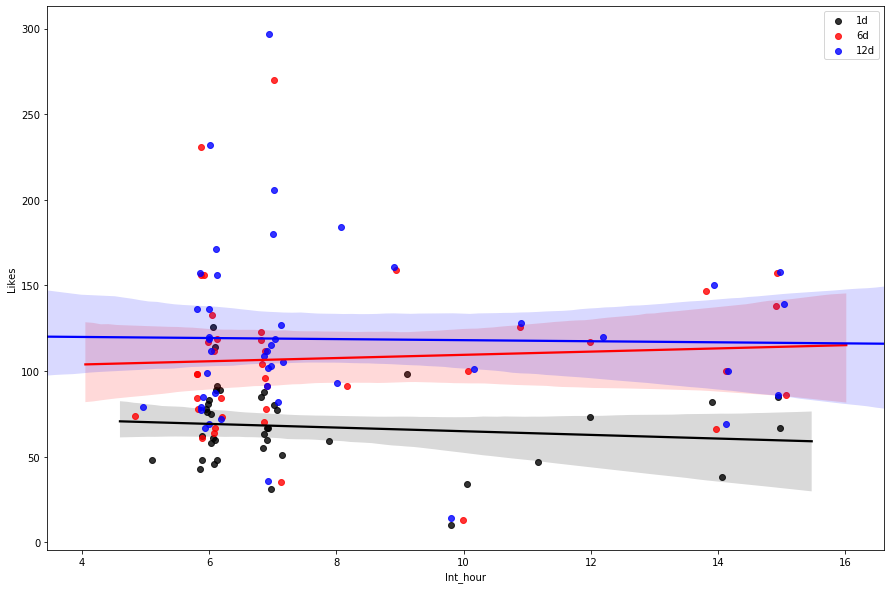

In [104]:
plt.figure(figsize=(15, 10))
sns.regplot(x='Int_hour', y='Likes', data=inst_h_d_to_use.loc['1d'], color='black', label='1d', x_jitter=0.2, fit_reg=True)
sns.regplot(x='Int_hour', y='Likes', data=inst_h_d_to_use.loc['6d'], color='red', label='6d', x_jitter=0.2,fit_reg=True)
sns.regplot(x='Int_hour', y='Likes', data=inst_h_d_to_use.loc['12d'], color='blue', label='12d', x_jitter=0.2, fit_reg=True)
plt.legend();

## Statistics

In [105]:
inst_h_d_to_use.loc['1h'][['Likes', 'Time_intervals']].groupby(['Time_intervals']).describe()

Likes                                                   
               count       mean       std   min   25%   50%   75%   max
Time_intervals                                                         
10-16            7.0  19.000000  6.608076   6.0  17.5  21.0  22.0  27.0
4-7             23.0  20.217391  6.980209   9.0  15.5  21.0  25.0  35.0
7-10            11.0  22.090909  5.467258  16.0  17.5  20.0  26.5  32.0

In [106]:
inst_h_d_to_use.loc['6h'][['Likes', 'Time_intervals']].groupby(['Time_intervals']).describe()

Likes                                                    
               count       mean        std   min   25%   50%   75%   max
Time_intervals                                                          
10-16            7.0  30.714286  13.499559   9.0  27.0  29.0  34.5  54.0
4-7             23.0  43.391304  11.884823  22.0  35.0  44.0  53.5  66.0
7-10            11.0  41.090909   8.239594  27.0  38.0  42.0  47.0  52.0

In [107]:
inst_h_d_to_use.loc['12h'][['Likes', 'Time_intervals']].groupby(['Time_intervals']).describe()

Likes                                                      
               count       mean        std   min    25%   50%    75%   max
Time_intervals                                                            
10-16            8.0  38.000000  17.744214   9.0  29.25  33.0  56.25  59.0
4-7             23.0  56.000000  15.917400  24.0  43.50  55.0  67.00  87.0
7-10            11.0  57.454545   9.811867  41.0  52.00  57.0  65.00  69.0

In [108]:
inst_h_d_to_use.loc['1d'][['Likes', 'Time_intervals']].groupby(['Time_intervals']).describe()

Likes                                                  
               count  mean        std   min    25%   50%    75%    max
Time_intervals                                                        
10-16            8.0  54.5  26.495283  10.0  37.00  57.0  75.25   85.0
4-7             22.0  69.5  23.447510  31.0  49.75  64.5  82.50  126.0
7-10            10.0  72.8  15.068731  51.0  60.75  72.0  83.75   98.0

In [109]:
inst_h_d_to_use.loc['6d'][['Likes', 'Time_intervals']].groupby(['Time_intervals']).describe()

Likes                                                          
               count        mean        std   min    25%    50%     75%    max
Time_intervals                                                                
10-16           10.0  105.000000  42.866719  13.0  89.50  108.5  135.00  157.0
4-7             19.0  100.947368  44.921504  35.0  73.50   84.0  118.00  231.0
7-10            10.0  123.400000  56.761098  70.0  92.25  108.0  121.75  270.0

In [110]:
inst_h_d_to_use.loc['12d'][['Likes', 'Time_intervals']].groupby(['Time_intervals']).describe()

Likes                                                          
               count        mean        std   min    25%    50%     75%    max
Time_intervals                                                                
10-16           10.0  106.500000  43.076805  14.0   89.5  110.5  136.25  158.0
4-7             24.0  115.625000  48.192379  36.0   79.0  107.5  141.00  232.0
7-10            11.0  136.363636  60.427267  91.0  103.5  112.0  144.00  297.0

### Correlation

In [16]:
ind_names = ('1h', '6h', '12h', '1d', '6d', '12d')
corr_dict = {'%s' %ind :inst_h_d_to_use.loc[ind]['Likes'].corr(inst_h_d_to_use.loc[ind]['Int_hour']) for ind in ind_names}
for name, corr in corr_dict.items():
    print('%s: %s\n' %(name, corr))

1h: 0.006522701649949623

6h: -0.25816888239888214

12h: -0.31037895946598903

1d: -0.12875793666188126

6d: 0.06196442375367117

12d: -0.01825883695090743



In [14]:
corr_dict2 = {'%s' %ind : spearmanr(inst_h_d_to_use.loc[ind]['Likes'], inst_h_d_to_use.loc[ind]['Int_hour']) for ind in ind_names}
for name, corr in corr_dict2.items():
    print('%s: %s\n' %(name, corr.correlation))

1h: 0.030593579934466666

6h: -0.28247087240832375

12h: -0.2502032752539632

1d: -0.12807295512346215

6d: 0.16923517268670255

12d: 0.12249944773104057



## Tests

In [112]:
kruskal(*[group["Likes"].values for _, group in inst_h_d_to_use.loc['1h'][['Likes', 'Time_intervals']].groupby(['Time_intervals'])])

KruskalResult(statistic=0.5451066869719103, pvalue=0.7614328106114083)

In [113]:
kruskal(*[group["Likes"].values for _, group in inst_h_d_to_use.loc['6h'][['Likes', 'Time_intervals']].groupby(['Time_intervals'])])

KruskalResult(statistic=4.95897523459297, pvalue=0.0837861451672109)

In [114]:
kruskal(*[group["Likes"].values for _, group in inst_h_d_to_use.loc['12h'][['Likes', 'Time_intervals']].groupby(['Time_intervals'])])

KruskalResult(statistic=6.417241478486145, pvalue=0.04041231396906232)

In [115]:
sp.posthoc_dunn(inst_h_d_to_use.loc['12h'][['Likes', 'Time_intervals']], val_col='Likes', group_col='Time_intervals', p_adjust = 'holm')

,10-16,4-7,7-10
10-16,-1.00000,0.059970,0.059970
4-7,0.05997,-1.000000,0.773932
7-10,0.05997,0.773932,-1.000000


In [116]:
kruskal(*[group["Likes"].values for _, group in inst_h_d_to_use.loc['1d'][['Likes', 'Time_intervals']].groupby(['Time_intervals'])])

KruskalResult(statistic=2.5245465856802687, pvalue=0.2830099302193677)

In [117]:
kruskal(*[group["Likes"].values for _, group in inst_h_d_to_use.loc['6d'][['Likes', 'Time_intervals']].groupby(['Time_intervals'])])

KruskalResult(statistic=2.0618922204213987, pvalue=0.3566693523709274)

In [118]:
kruskal(*[group["Likes"].values for _, group in inst_h_d_to_use.loc['12d'][['Likes', 'Time_intervals']].groupby(['Time_intervals'])])

KruskalResult(statistic=1.354013444049031, pvalue=0.5081357096884614)

In [119]:
kruskal(*[group["Likes"].values for _, group in inst_h_d_to_use.loc['12d'][['Likes', 'Time_intervals']].groupby(['Time_intervals'])])

KruskalResult(statistic=1.354013444049031, pvalue=0.5081357096884614)

## Number of likes in time intervals

### Each photo as single observation

In [3]:
diff_pipe = Pipeline([('diff_maker', select_by_time(time_freq='3h')),
                      ('add_intervals', hours_interval(dividing_points=range(0, 25, 3),
                                                       low_int=True, int_time_col='Time',
                                                       full_day=True)),
                     ('first_app_int', hours_interval(dividing_points=range(0, 25, 3),
                                                       low_int=False, int_time_col='First_app',
                                                       full_day=True, new_col_name='First_app_int'))])
inst_diff_likes = diff_pipe.transform(instagram)

In [4]:
inst_no0_diff_likes = inst_diff_likes.loc[inst_diff_likes.Diff_likes != 0]

#### Plots

In [5]:
hue_order_time_int = create_time_intervals(range(0,25,3))

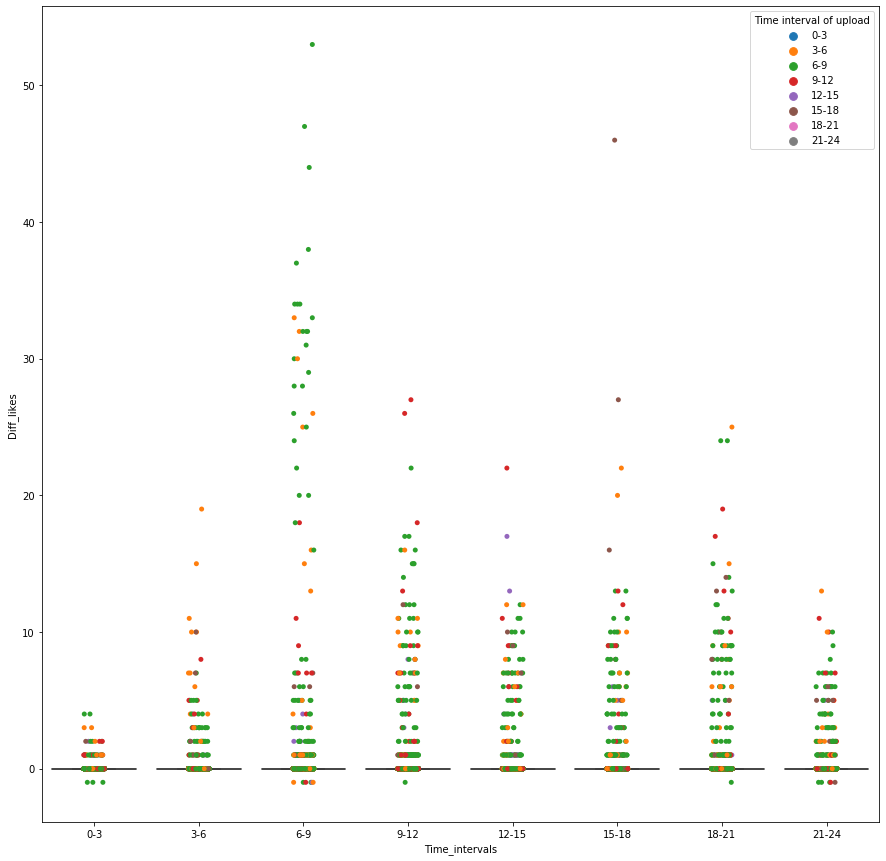

In [10]:
plt.figure(figsize=(15,15))
sns.boxplot(x="Time_intervals", y="Diff_likes", data=inst_diff_likes, showfliers=False)
sns.stripplot(x="Time_intervals", y="Diff_likes", data=inst_diff_likes, jitter=True, hue='First_app_int',
             hue_order=hue_order_time_int)
plt.legend(title='Time interval of upload');

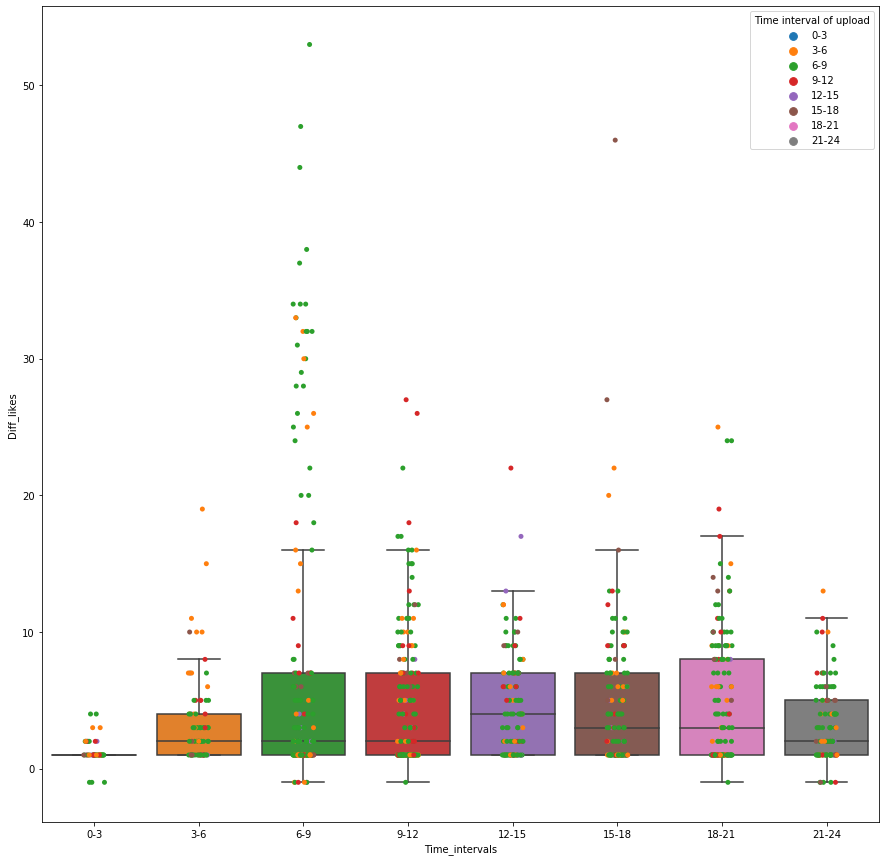

In [14]:
plt.figure(figsize=(15,15))
sns.boxplot(x="Time_intervals", y="Diff_likes", data=inst_no0_diff_likes, showfliers=False)
sns.stripplot(x="Time_intervals", y="Diff_likes", data=inst_no0_diff_likes, jitter=True, hue='First_app_int',
             hue_order=hue_order_time_int)
plt.legend(title='Time interval of upload');

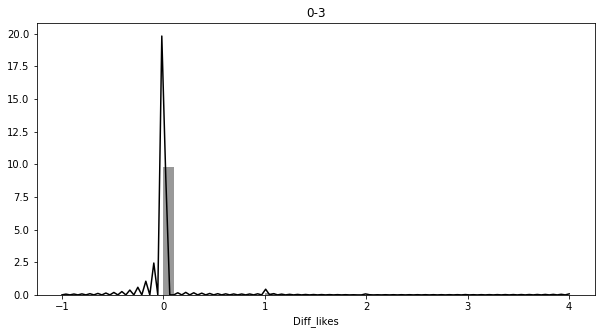

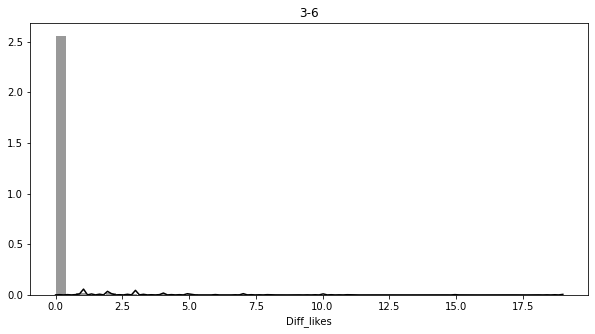

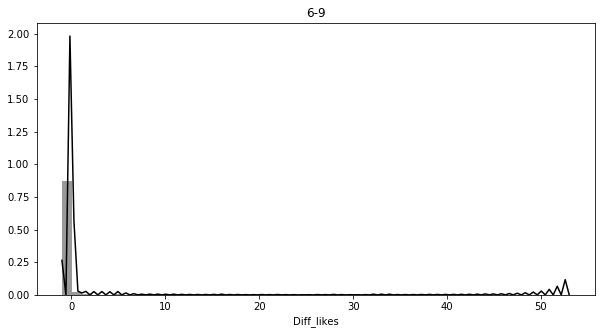

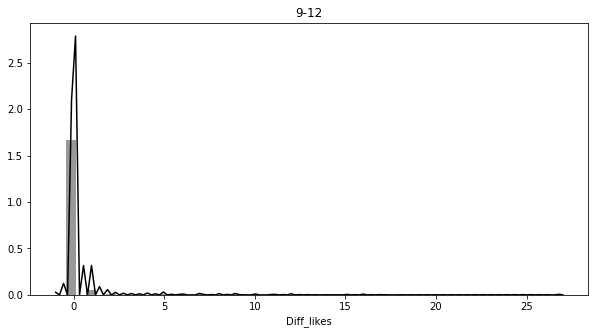

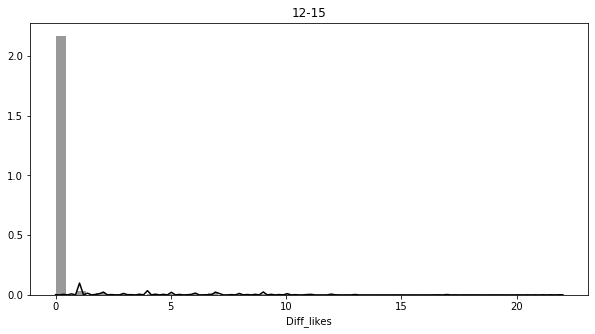

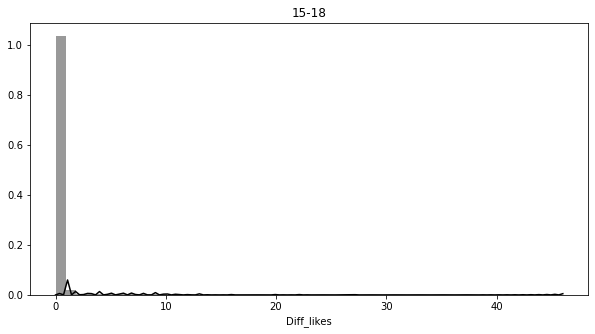

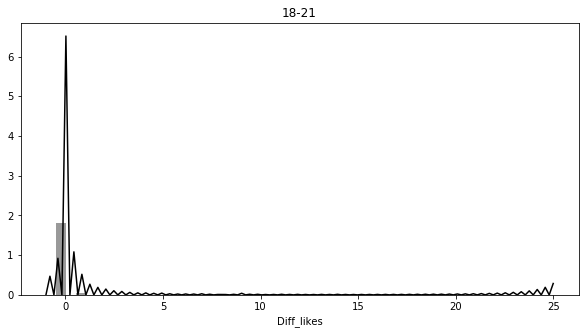

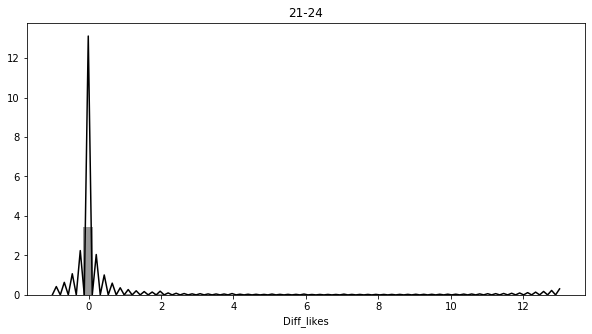

In [12]:
time_int_hist = inst_no0_diff_likes.Time_intervals.unique()
for time_int in time_int_hist:
    plt.figure(figsize=(10,5))
    sns.distplot(inst_diff_likes.loc[inst_diff_likes.Time_intervals == time_int]['Diff_likes'],
                 color="black").set_title(time_int);

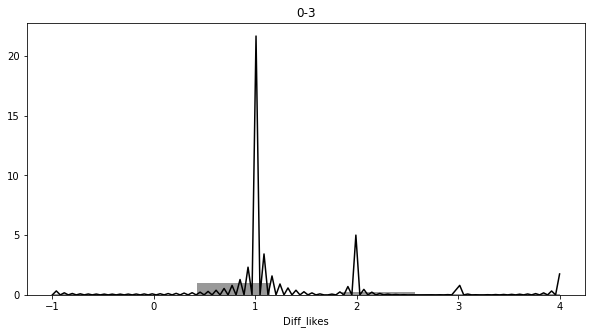

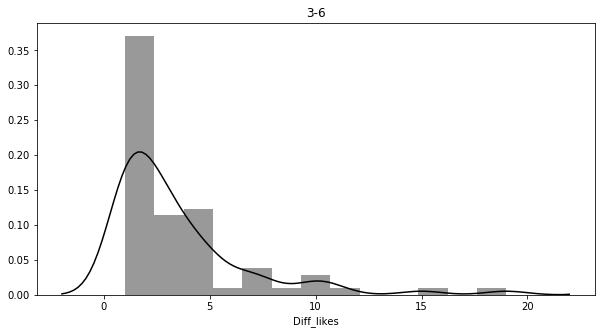

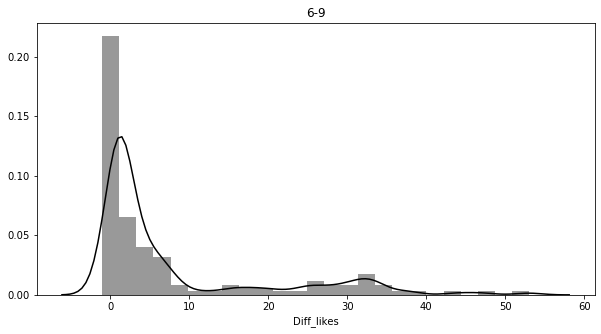

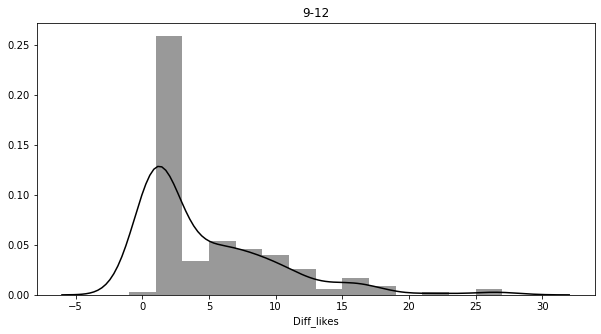

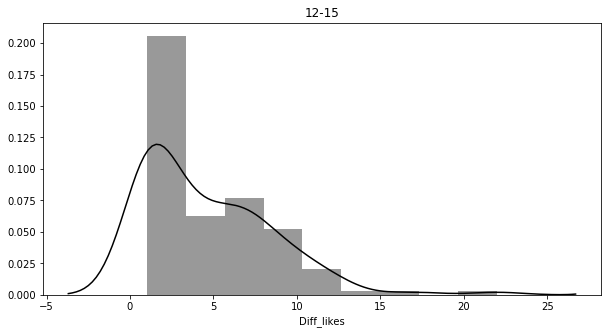

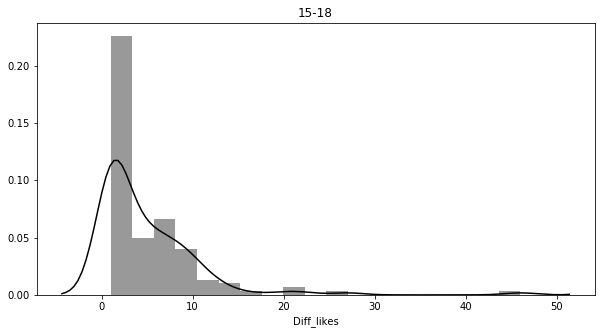

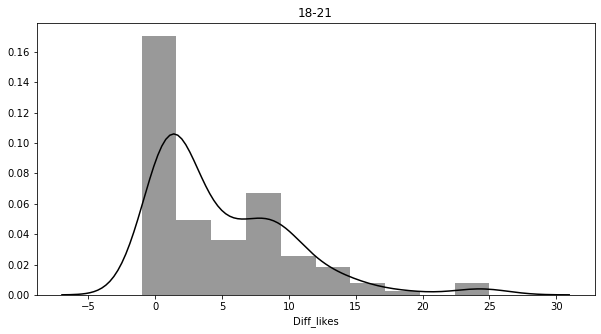

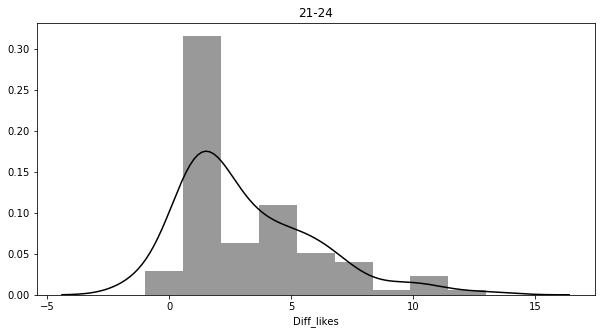

In [13]:
for time_int in time_int_hist:
    plt.figure(figsize=(10,5))
    sns.distplot(inst_no0_diff_likes.loc[inst_no0_diff_likes.Time_intervals == time_int]['Diff_likes'],
                 color="black").set_title(time_int);

#### Statistics

In [14]:
inst_diff_likes[['Diff_likes', 'Time_intervals']].groupby(['Time_intervals'], sort=False).describe()

Diff_likes                                              
                    count      mean       std  min  25%  50%  75%   max
Time_intervals                                                         
0-3                2664.0  0.022898  0.210147 -1.0  0.0  0.0  0.0   4.0
3-6                2664.0  0.099850  0.806805  0.0  0.0  0.0  0.0  19.0
6-9                2646.0  0.478836  3.446503 -1.0  0.0  0.0  0.0  53.0
9-12               2646.0  0.318594  1.784879 -1.0  0.0  0.0  0.0  27.0
12-15              2646.0  0.213908  1.276948  0.0  0.0  0.0  0.0  22.0
15-18              2664.0  0.235360  1.660143  0.0  0.0  0.0  0.0  46.0
18-21              2664.0  0.280781  1.667878 -1.0  0.0  0.0  0.0  25.0
21-24              2646.0  0.133787  0.849027 -1.0  0.0  0.0  0.0  13.0

In [15]:
inst_no0_diff_likes[['Diff_likes', 'Time_intervals']].groupby(['Time_intervals'], sort=False).describe()

Diff_likes                                               
                    count      mean        std  min  25%  50%  75%   max
Time_intervals                                                          
0-3                  49.0  1.244898   0.947158 -1.0  1.0  1.0  1.0   4.0
3-6                  76.0  3.500000   3.324655  1.0  1.0  2.0  4.0  19.0
6-9                 162.0  7.820988  11.720293 -1.0  1.0  2.0  7.0  53.0
9-12                176.0  4.789773   5.158749 -1.0  1.0  2.0  7.0  27.0
12-15               123.0  4.601626   3.872433  1.0  1.0  4.0  7.0  22.0
15-18               127.0  4.937008   5.903655  1.0  1.0  3.0  7.0  46.0
18-21               149.0  5.020134   5.108908 -1.0  1.0  3.0  8.0  25.0
21-24               112.0  3.160714   2.742898 -1.0  1.0  2.0  5.0  13.0

#### Tests

In [16]:
kruskal(*[group["Diff_likes"].values for _, group in inst_diff_likes[['Diff_likes', 'Time_intervals']].groupby(['Time_intervals'])])

KruskalResult(statistic=112.06494998534252, pvalue=3.422838151989864e-21)

In [7]:
time_int_photo_ph = sp.posthoc_dunn(inst_diff_likes[['Diff_likes', 'Time_intervals']], val_col='Diff_likes',
                group_col='Time_intervals',
                p_adjust='holm-sidak').replace(-1,1)
reindex_ph(time_int_photo_ph).style.background_gradient(cmap='coolwarm_r')

,0-3,3-6,6-9,9-12,12-15,15-18,18-21,21-24
0-3,1,0.284879,2.65737e-11,0,1.90487e-06,6.50782e-07,1.62142e-10,0.00147057
3-6,0.284879,1,1.78269e-05,2.1837e-09,0.0236932,0.014162,6.00671e-05,0.550867
6-9,2.65737e-11,1.78269e-05,1,0.606866,0.550867,0.606866,0.954633,0.0236932
9-12,0,2.1837e-09,0.606866,1,0.0151557,0.0236932,0.539379,4.78407e-05
12-15,1.90487e-06,0.0236932,0.550867,0.0151557,1,0.954633,0.606866,0.606866
15-18,6.50782e-07,0.014162,0.606866,0.0236932,0.954633,1,0.606866,0.606866
18-21,1.62142e-10,6.00671e-05,0.954633,0.539379,0.606866,0.606866,1,0.0459319
21-24,0.00147057,0.550867,0.0236932,4.78407e-05,0.606866,0.606866,0.0459319,1


In [18]:
kruskal(*[group["Diff_likes"].values for _, group in inst_no0_diff_likes[['Diff_likes', 'Time_intervals']].groupby(['Time_intervals'])])

KruskalResult(statistic=38.76317816564896, pvalue=2.1686458039700117e-06)

In [6]:
time_int_photo_ph_no0 = sp.posthoc_dunn(inst_no0_diff_likes[['Diff_likes', 'Time_intervals']], val_col='Diff_likes',
                group_col='Time_intervals',
                p_adjust='holm-sidak').replace(-1,1)
reindex_ph(time_int_photo_ph_no0).style.background_gradient(cmap='coolwarm_r')

,0-3,3-6,6-9,9-12,12-15,15-18,18-21,21-24
0-3,1,0.000437241,2.47327e-05,9.83941e-06,2.03521e-07,3.19403e-06,2.24583e-06,0.00134264
3-6,0.000437241,1,0.999372,0.999372,0.964982,0.999372,0.999372,0.999372
6-9,2.47327e-05,0.999372,1,0.999372,0.919967,0.999372,0.999372,0.99848
9-12,9.83941e-06,0.999372,0.999372,1,0.964982,0.999372,0.999372,0.991526
12-15,2.03521e-07,0.964982,0.919967,0.964982,1,0.999372,0.999372,0.425891
15-18,3.19403e-06,0.999372,0.999372,0.999372,0.999372,1,0.999372,0.916722
18-21,2.24583e-06,0.999372,0.999372,0.999372,0.999372,0.999372,1,0.916722
21-24,0.00134264,0.999372,0.99848,0.991526,0.425891,0.916722,0.916722,1


### Each day as single observation

In [8]:
diff_group_pipe = Pipeline([('diff_maker', select_by_time(time_freq='3h')),
                            ('add_intervals', hours_interval(dividing_points=range(0, 25, 3),
                                                             low_int=True, int_time_col='Time', full_day=True)),
                            ('group_int', group_by_days())])
inst_int_group_likes = diff_group_pipe.transform(instagram)
inst_int_no0_group_likes = inst_int_group_likes.loc[inst_int_group_likes['Diff_likes'] != 0]

#### Plots

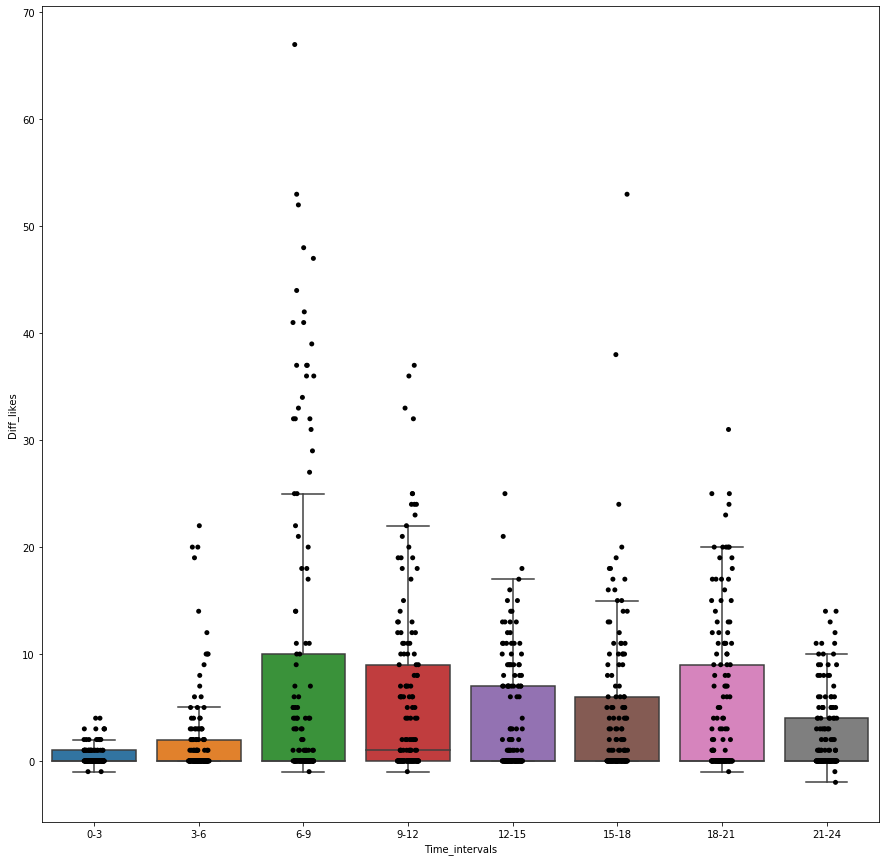

In [25]:
plt.figure(figsize=(15,15))
sns.boxplot(x="Time_intervals", y="Diff_likes", data=inst_int_group_likes, showfliers = False);
sns.stripplot(x="Time_intervals", y="Diff_likes", data=inst_int_group_likes, jitter=True, color='black');

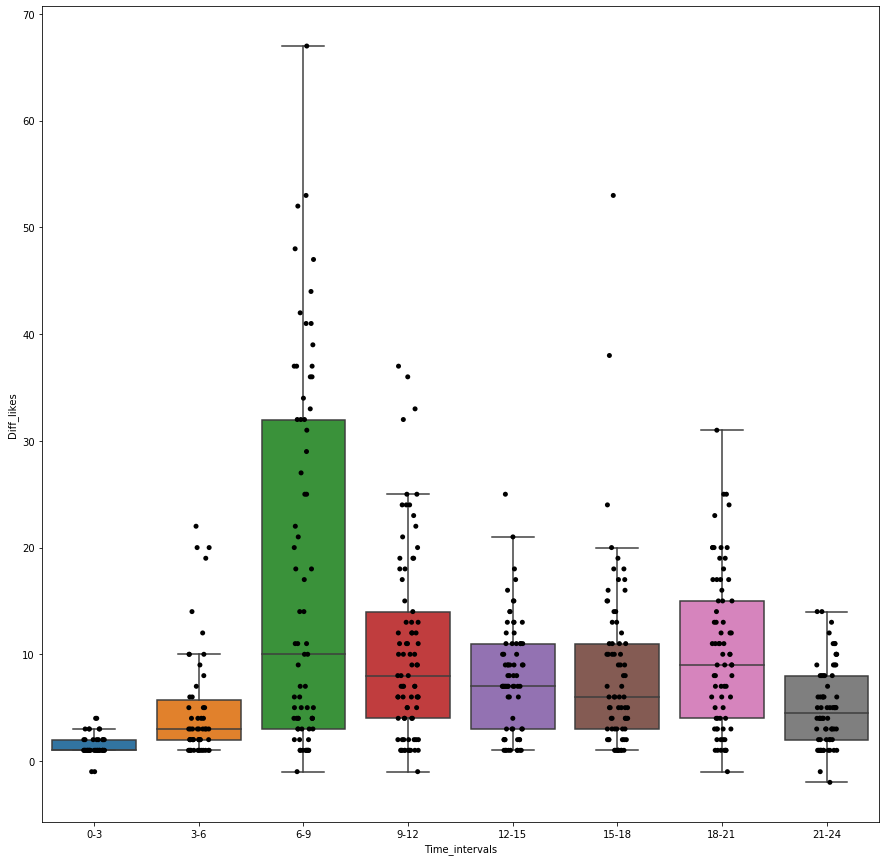

In [9]:
plt.figure(figsize=(15,15))
sns.boxplot(x="Time_intervals", y="Diff_likes", data=inst_int_no0_group_likes, showfliers = False);
sns.stripplot(x="Time_intervals", y="Diff_likes", data=inst_int_no0_group_likes, jitter=True, color='black');

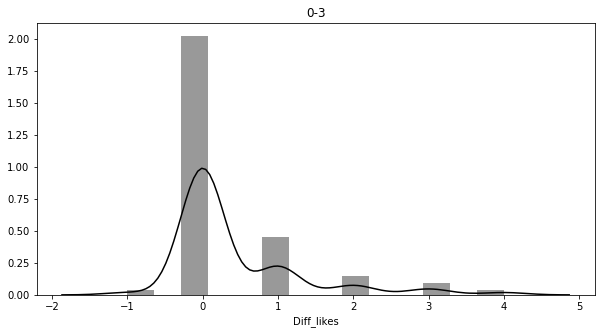

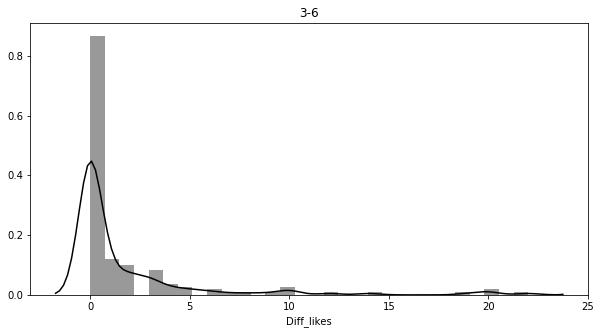

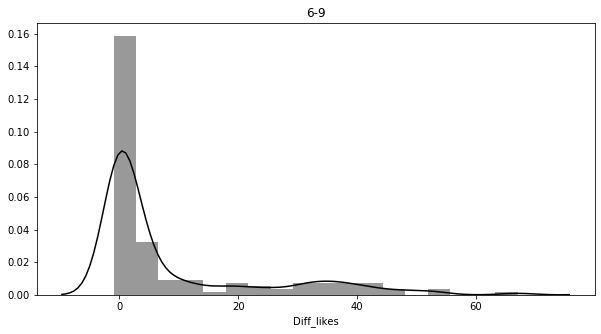

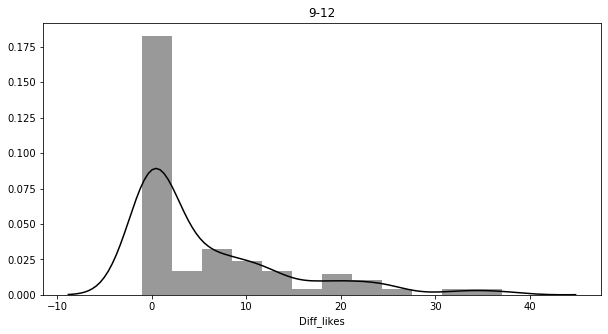

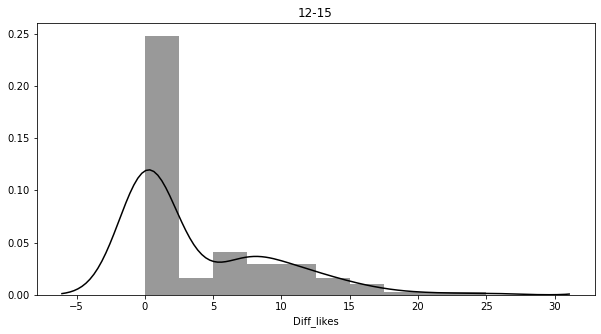

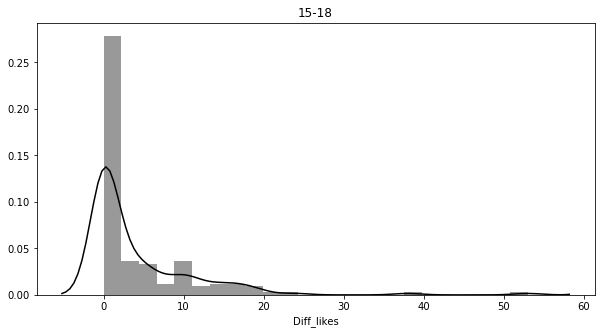

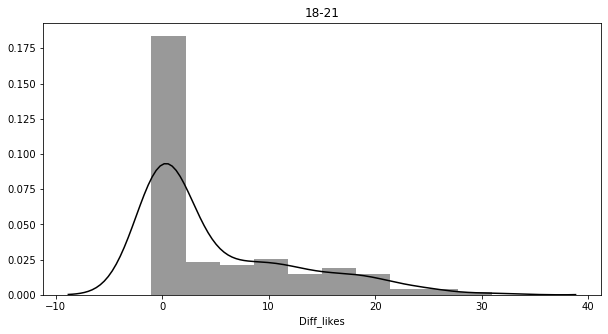

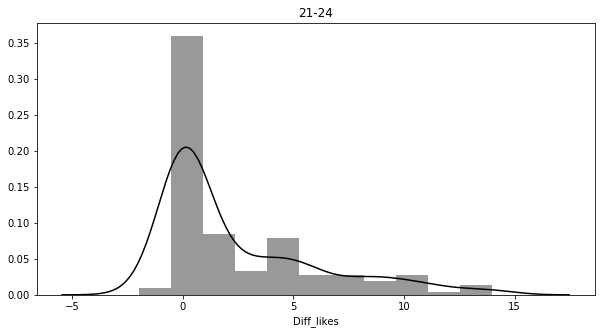

In [28]:
for time_int in time_int_hist:
    plt.figure(figsize=(10,5))
    sns.distplot(inst_int_group_likes.loc[inst_int_group_likes.Time_intervals == time_int]['Diff_likes'],
                 color="black").set_title(time_int);

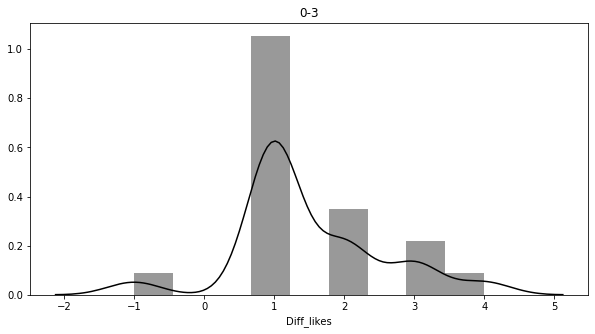

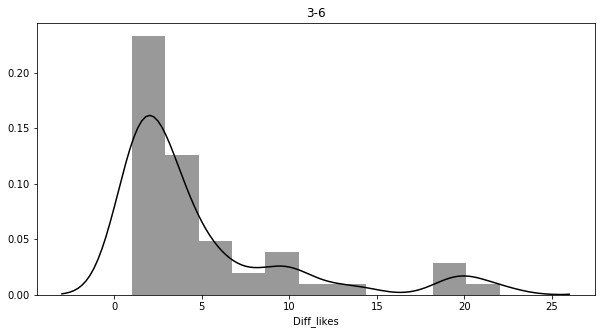

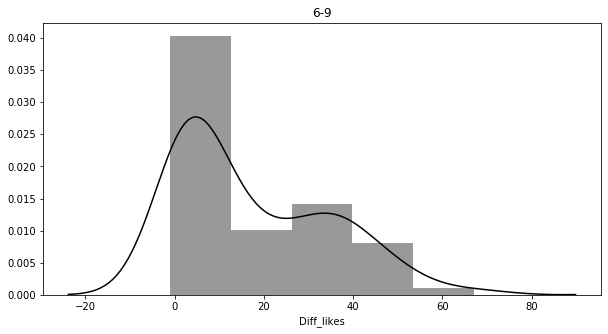

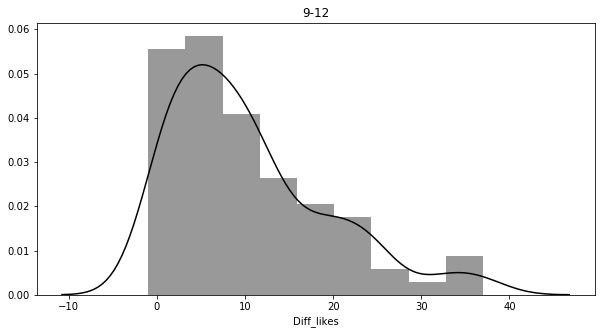

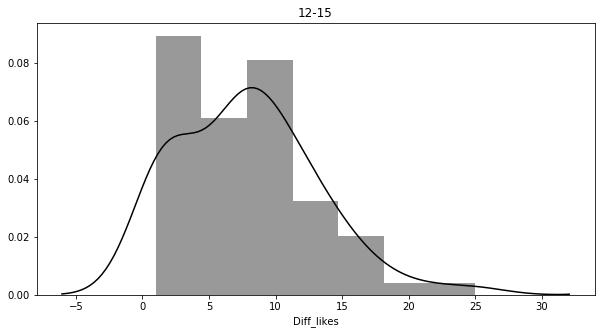

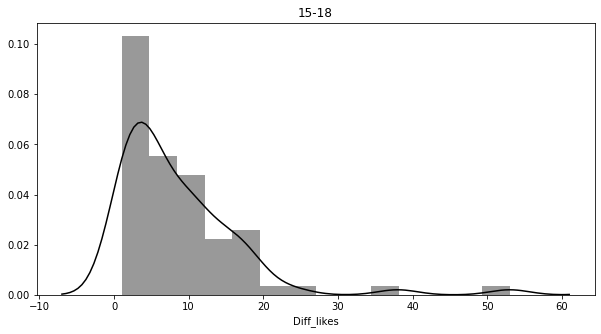

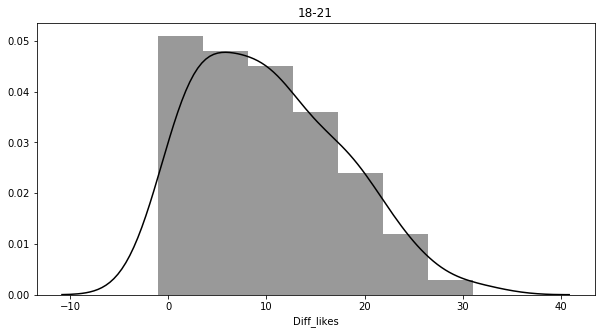

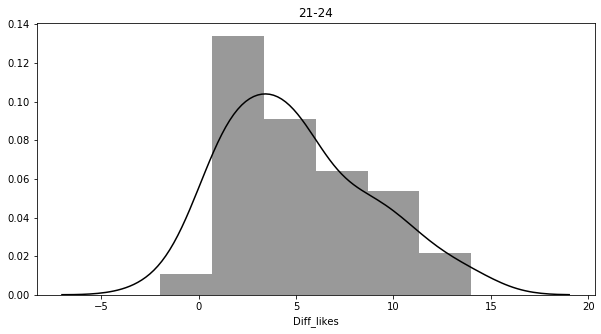

In [29]:
for time_int in time_int_hist:
    plt.figure(figsize=(10,5))
    sns.distplot(inst_int_no0_group_likes.loc[inst_int_no0_group_likes.Time_intervals == time_int]['Diff_likes'],
                 color="black").set_title(time_int);

#### Statistics

In [30]:
inst_int_group_likes.groupby('Time_intervals', sort=False).describe()

Diff_likes                                                
                    count      mean        std  min  25%  50%   75%   max
Time_intervals                                                           
0-3                 148.0  0.412162   0.864485 -1.0  0.0  0.0   1.0   4.0
3-6                 148.0  1.797297   3.998230  0.0  0.0  0.0   2.0  22.0
6-9                 147.0  8.619048  14.740371 -1.0  0.0  0.0  10.0  67.0
9-12                147.0  5.734694   8.403625 -1.0  0.0  1.0   9.0  37.0
12-15               147.0  3.850340   5.366504  0.0  0.0  0.0   7.0  25.0
15-18               148.0  4.236486   7.359904  0.0  0.0  0.0   6.0  53.0
18-21               148.0  5.054054   7.242903 -1.0  0.0  0.0   9.0  31.0
21-24               147.0  2.408163   3.589855 -2.0  0.0  0.0   4.0  14.0

In [31]:
inst_int_no0_group_likes.groupby('Time_intervals', sort=False).describe()

Diff_likes                                                   
                    count       mean        std  min  25%   50%    75%   max
Time_intervals                                                              
0-3                  41.0   1.487805   1.051712 -1.0  1.0   1.0   2.00   4.0
3-6                  54.0   4.925926   5.351254  1.0  2.0   3.0   5.75  22.0
6-9                  73.0  17.356164  16.936458 -1.0  3.0  10.0  32.00  67.0
9-12                 81.0  10.407407   8.924374 -1.0  4.0   8.0  14.00  37.0
12-15                72.0   7.861111   5.219966  1.0  3.0   7.0  11.00  25.0
15-18                73.0   8.589041   8.525836  1.0  3.0   6.0  11.00  53.0
18-21                73.0  10.246575   7.291130 -1.0  4.0   9.0  15.00  31.0
21-24                70.0   5.057143   3.698357 -2.0  2.0   4.5   8.00  14.0

#### Tests

In [32]:
kruskal(*[group["Diff_likes"].values for _, group in inst_int_group_likes[['Diff_likes', 'Time_intervals']].groupby(['Time_intervals'])])

KruskalResult(statistic=67.54457069373315, pvalue=4.624544968412932e-12)

In [10]:
time_int_day_ph = sp.posthoc_dunn(inst_int_group_likes[['Diff_likes', 'Time_intervals']], val_col='Diff_likes',
                group_col='Time_intervals',
                p_adjust='holm-sidak').replace(-1,1)
reindex_ph(time_int_day_ph).style.background_gradient(cmap='coolwarm_r')

,0-3,3-6,6-9,9-12,12-15,15-18,18-21,21-24
0-3,1,0.282301,8.50018e-08,2.50123e-09,3.05747e-06,3.54248e-06,3.31782e-07,0.00166861
3-6,0.282301,1,0.00638906,0.000696724,0.0538431,0.0576774,0.0147928,0.746336
6-9,8.50018e-08,0.00638906,1,0.992007,0.992007,0.992007,0.992007,0.533787
9-12,2.50123e-09,0.000696724,0.992007,1,0.912208,0.912208,0.987398,0.180543
12-15,3.05747e-06,0.0538431,0.992007,0.912208,1,0.992007,0.992007,0.911886
15-18,3.54248e-06,0.0576774,0.992007,0.912208,0.992007,1,0.992007,0.911886
18-21,3.31782e-07,0.0147928,0.992007,0.987398,0.992007,0.992007,1,0.711481
21-24,0.00166861,0.746336,0.533787,0.180543,0.911886,0.911886,0.711481,1


In [34]:
kruskal(*[group["Diff_likes"].values for _, group in inst_int_no0_group_likes[['Diff_likes', 'Time_intervals']].groupby(['Time_intervals'])])

KruskalResult(statistic=101.60420077810551, pvalue=5.0295093953289e-19)

In [11]:
time_int_day_ph_no0 = sp.posthoc_dunn(inst_int_no0_group_likes[['Diff_likes', 'Time_intervals']], val_col='Diff_likes',
                group_col='Time_intervals',
                p_adjust='holm-sidak').replace(-1,1)
reindex_ph(time_int_day_ph_no0).style.background_gradient(cmap='coolwarm_r')

,0-3,3-6,6-9,9-12,12-15,15-18,18-21,21-24
0-3,1,0.0110491,9.32587e-15,4.11915e-12,1.17242e-09,5.12899e-09,3.65707e-13,0.0002574
3-6,0.0110491,1,1.89441e-05,0.00104815,0.0184204,0.0406147,0.000198815,0.919163
6-9,9.32587e-15,1.89441e-05,1,0.89407,0.504174,0.314734,0.92809,0.0002574
9-12,4.11915e-12,0.00104815,0.89407,1,0.919163,0.89407,0.92809,0.0110491
12-15,1.17242e-09,0.0184204,0.504174,0.919163,1,0.92809,0.823357,0.132483
15-18,5.12899e-09,0.0406147,0.314734,0.89407,0.92809,1,0.655579,0.246274
18-21,3.65707e-13,0.000198815,0.92809,0.92809,0.823357,0.655579,1,0.00218901
21-24,0.0002574,0.919163,0.0002574,0.0110491,0.132483,0.246274,0.00218901,1


# Days of week

### Each photo as single observation

In [8]:
time_days_likes_diff_day_group = Pipeline([('Time_select', select_by_time(time_freq='1D')),
                                 ('Day_of_week',get_day_of_week(prev_day=True, sort_by_num=True)),
                                 ('Day_of_week_f_app',get_day_of_week(prev_day=False, time_col='First_app',
                                                                     day_col_name='Day_of_first_app', 
                                                                     day_col_num='Day_of_first_app_num',
                                                                     sort_by_num=False))])
photo_day_diff_likes = time_days_likes_diff_day_group.transform(instagram)

In [5]:
photo_day_diff_likes_no0 = photo_day_diff_likes.loc[photo_day_diff_likes.Diff_likes != 0]
photo_day_diff_likes_no_out = photo_day_diff_likes_no0[photo_day_diff_likes_no0.Diff_likes < 80]

In [6]:
hue_order_days = photo_day_diff_likes.Day_of_week.unique()

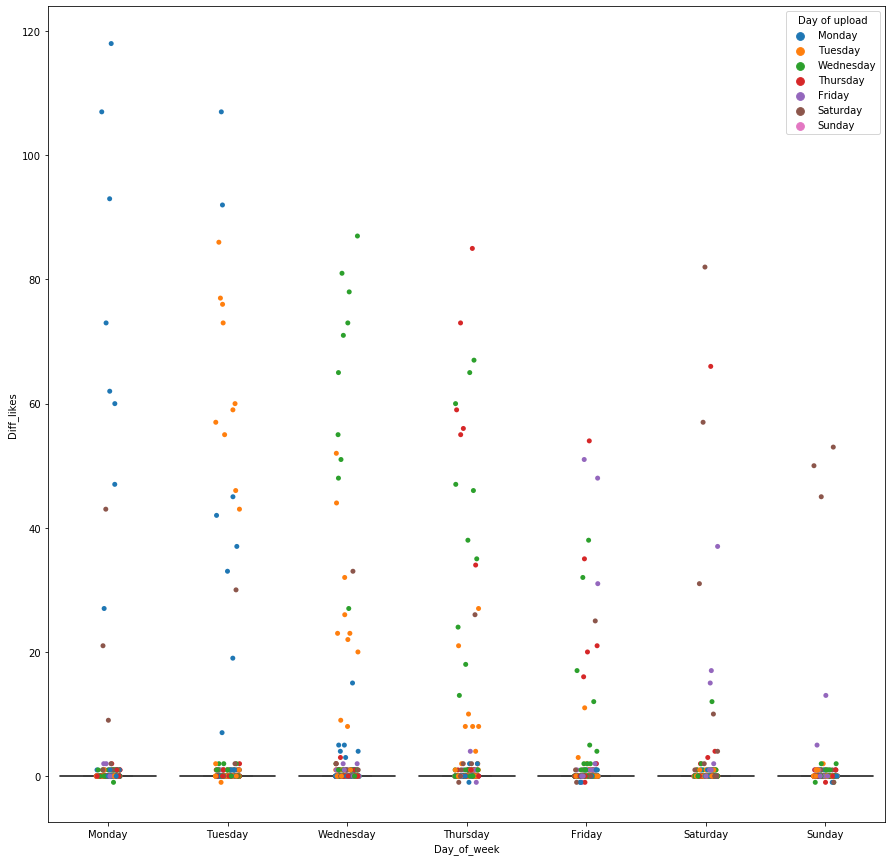

In [7]:
plt.figure(figsize=(15,15))
sns.boxplot(x="Day_of_week", y="Diff_likes", data=photo_day_diff_likes, showfliers=False);
sns.stripplot(x="Day_of_week", y="Diff_likes", data=photo_day_diff_likes, jitter=True, hue='Day_of_first_app', 
              hue_order = hue_order_days)
plt.legend(title='Day of upload');

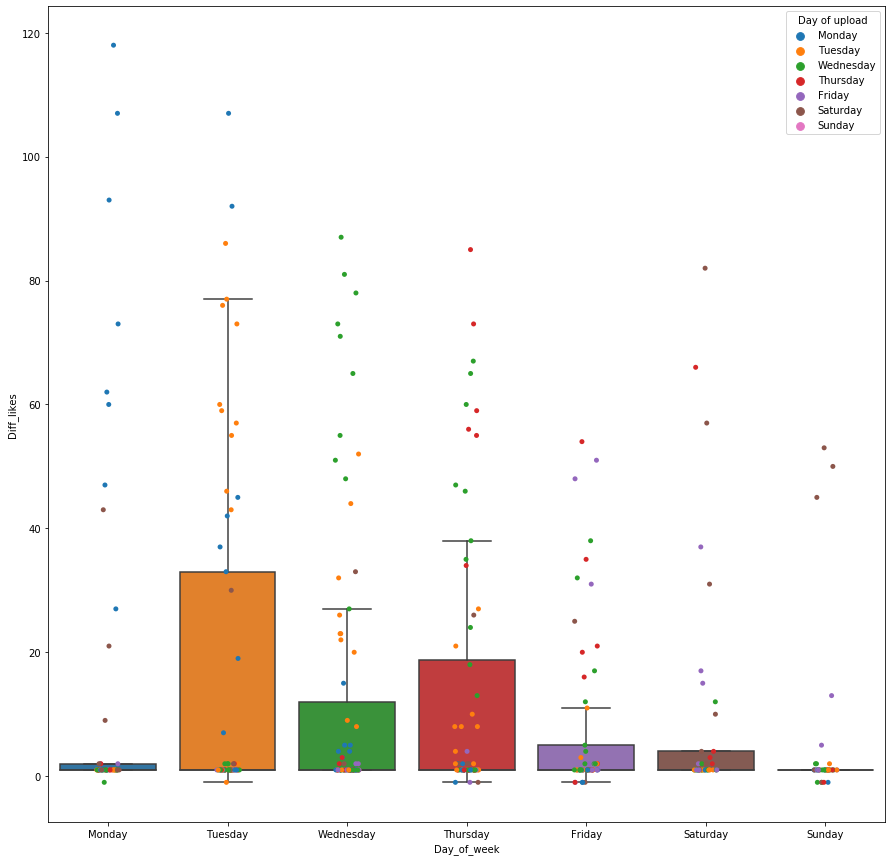

In [9]:
plt.figure(figsize=(15,15))
sns.boxplot(x="Day_of_week", y="Diff_likes", data=photo_day_diff_likes_no0, showfliers=False);
sns.stripplot(x="Day_of_week", y="Diff_likes", data=photo_day_diff_likes_no0, jitter=True, hue='Day_of_first_app', 
              hue_order = hue_order_days)
plt.legend(title='Day of upload');

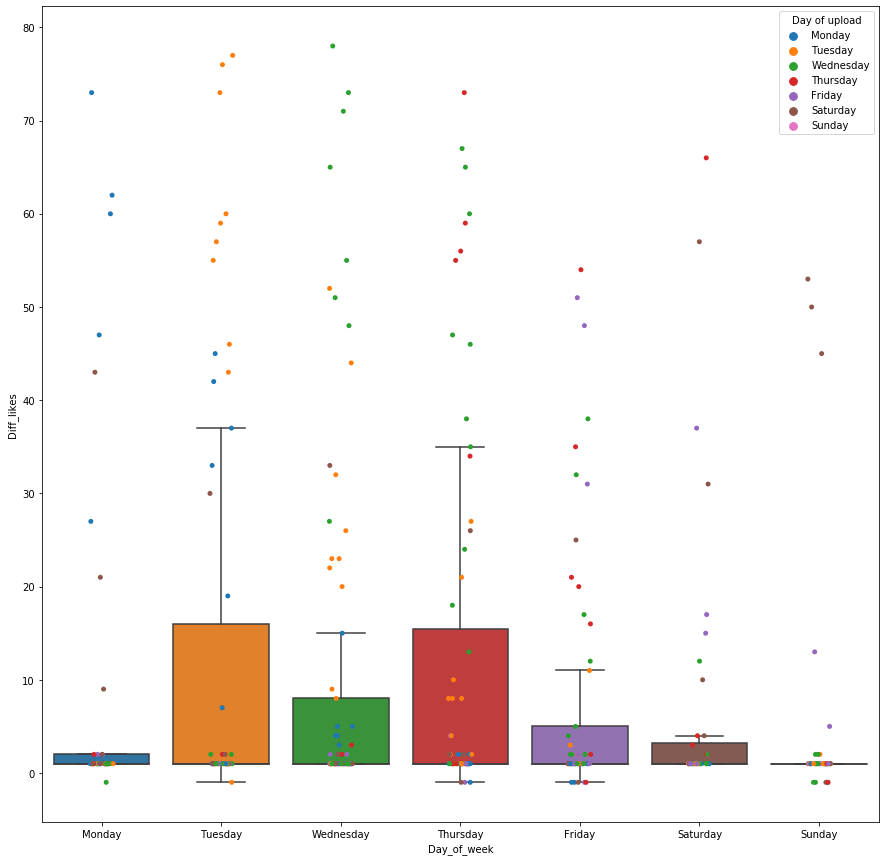

In [10]:
plt.figure(figsize=(15,15))
sns.boxplot(x="Day_of_week", y="Diff_likes", data=photo_day_diff_likes_no_out, showfliers=False);
sns.stripplot(x="Day_of_week", y="Diff_likes", data=photo_day_diff_likes_no_out, jitter=True, hue='Day_of_first_app', 
              hue_order = hue_order_days)
plt.legend(title='Day of upload');

In [69]:
week_days = photo_day_diff_likes['Day_of_week'].unique()

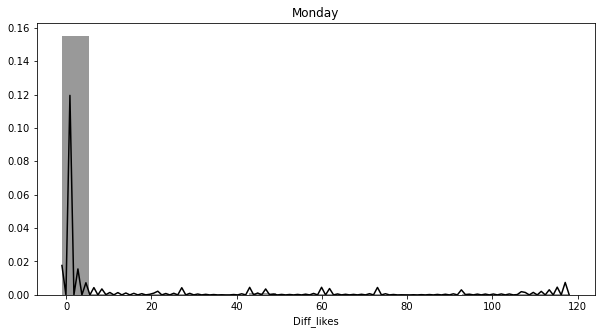

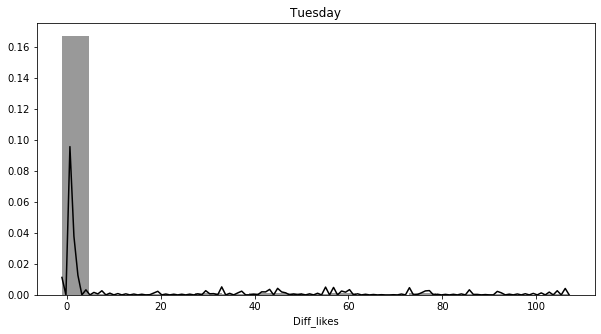

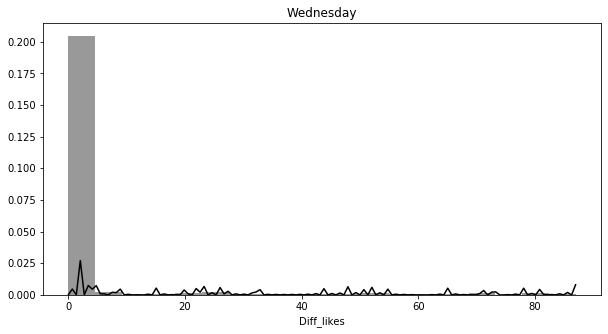

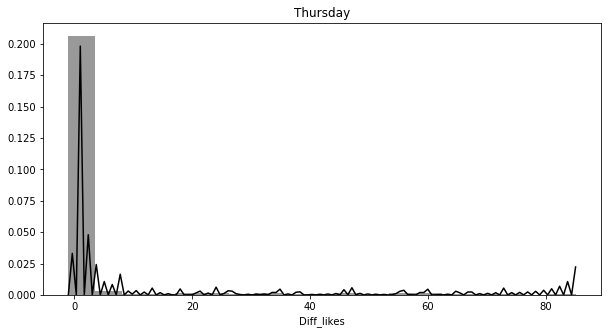

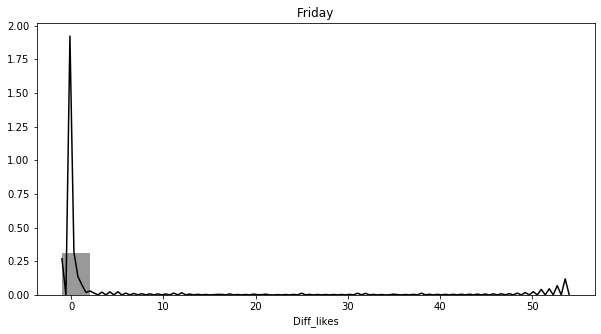

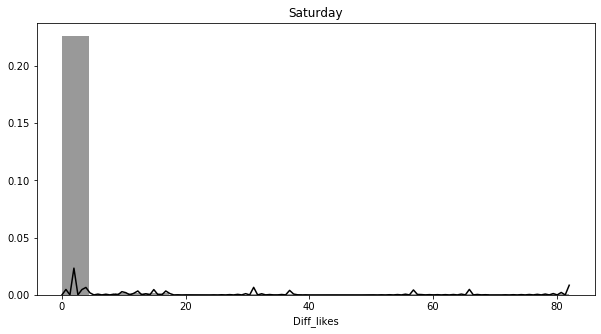

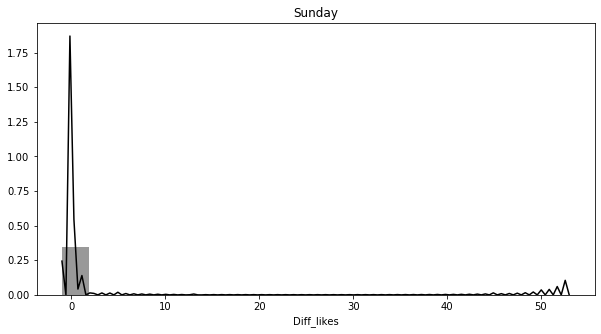

In [70]:
for week_day in week_days:
    plt.figure(figsize=(10,5))
    sns.distplot(photo_day_diff_likes.loc[photo_day_diff_likes.Day_of_week == week_day]['Diff_likes'],
                 color="black").set_title(week_day);

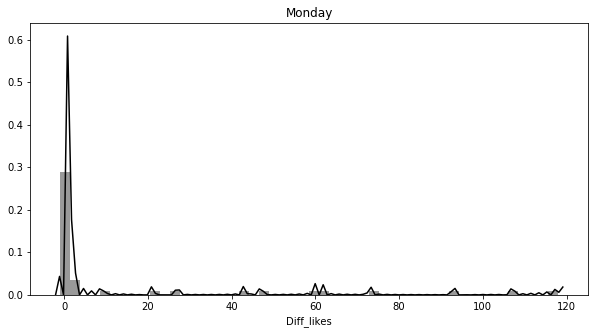

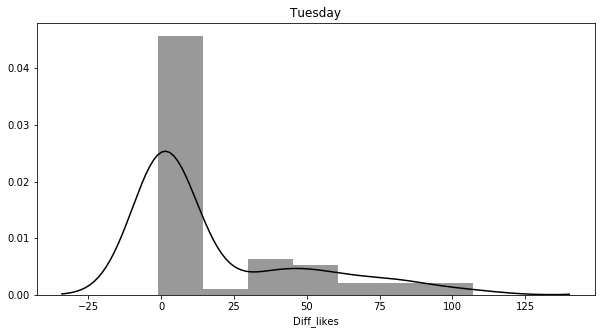

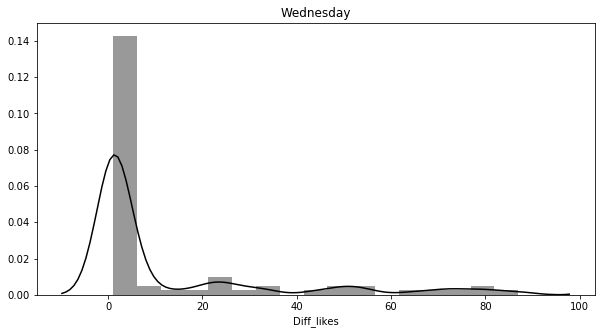

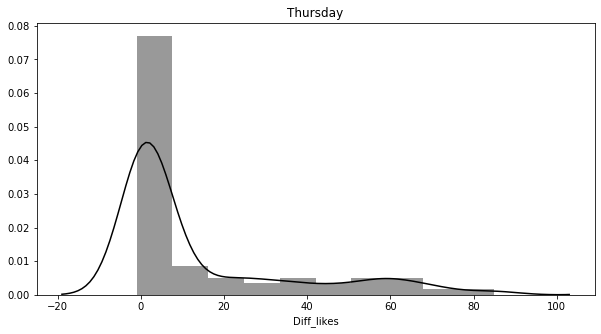

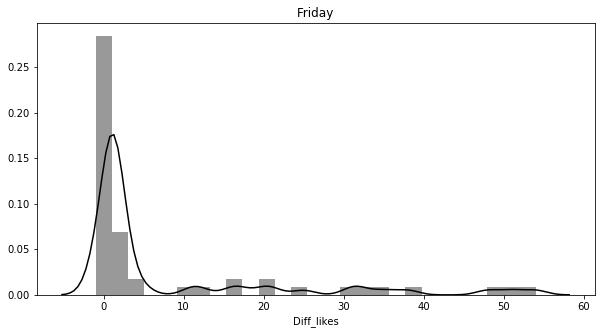

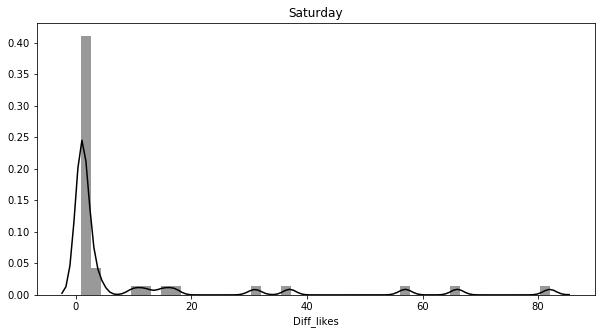

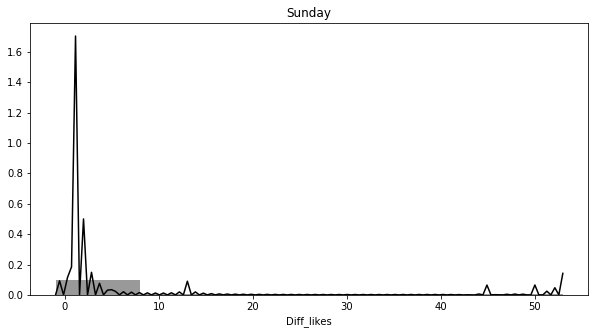

In [14]:
for week_day in week_days:
    plt.figure(figsize=(10,5))
    sns.distplot(photo_day_diff_likes_no0.loc[photo_day_diff_likes_no0.Day_of_week == week_day]['Diff_likes'],
                 color="black").set_title(week_day);

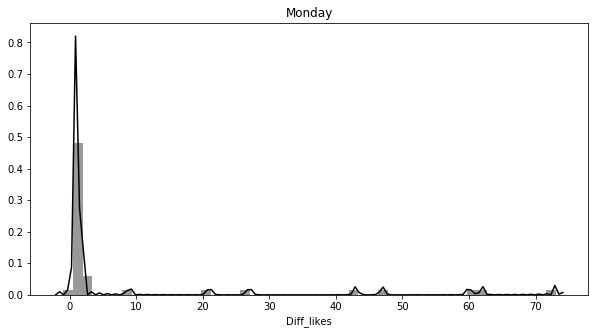

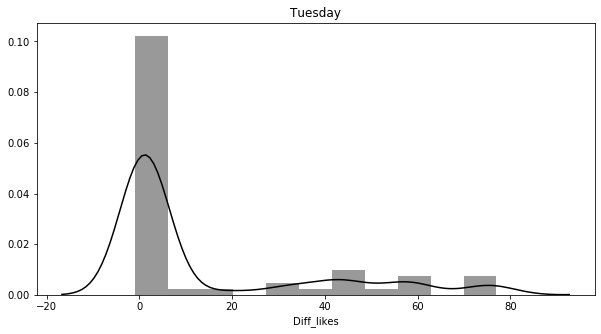

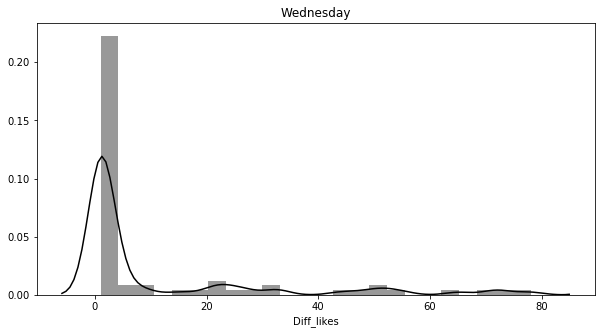

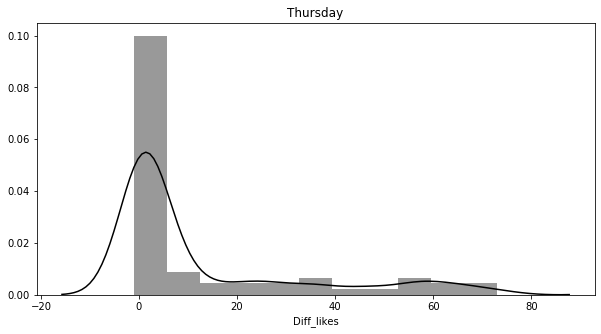

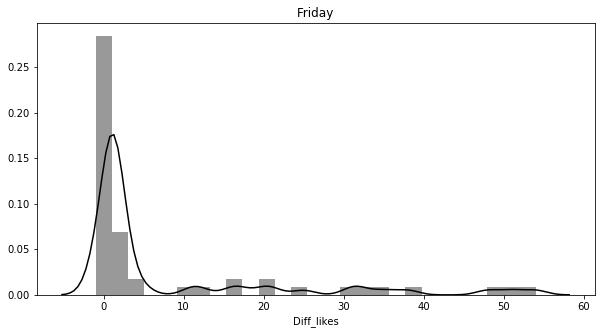

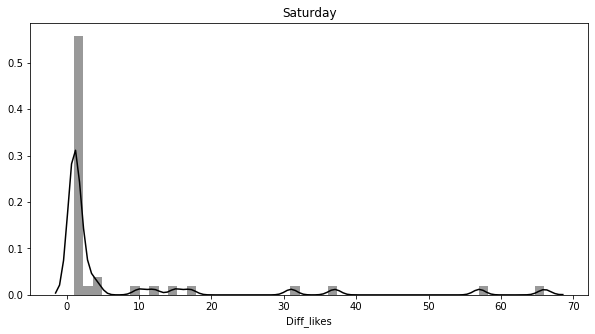

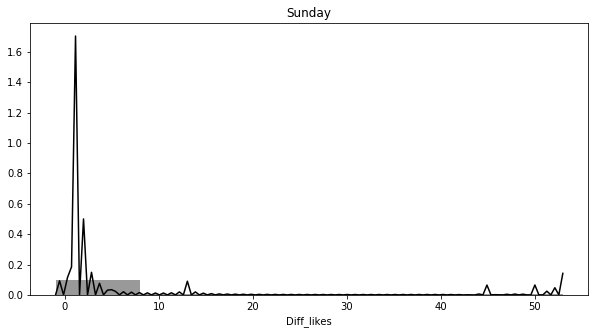

In [15]:
for week_day in week_days:
    plt.figure(figsize=(10,5))
    sns.distplot(photo_day_diff_likes_no_out.loc[photo_day_diff_likes_no_out.Day_of_week == week_day]['Diff_likes'],
                 color="black").set_title(week_day);

#### Statistics

In [71]:
photo_day_diff_likes[['Diff_likes', 'Day_of_week']].groupby('Day_of_week', sort=False).describe()

Diff_likes                                                
                 count      mean        std  min  25%  50%  75%    max
Day_of_week                                                           
Monday           378.0  1.849206  11.615000 -1.0  0.0  0.0  0.0  118.0
Tuesday          378.0  2.883598  13.244976 -1.0  0.0  0.0  0.0  107.0
Wednesday        379.0  2.699208  11.571461  0.0  0.0  0.0  0.0   87.0
Thursday         378.0  2.473545  10.760256 -1.0  0.0  0.0  0.0   85.0
Friday           360.0  1.277778   6.305638 -1.0  0.0  0.0  0.0   54.0
Saturday         378.0  0.981481   6.741705  0.0  0.0  0.0  0.0   82.0
Sunday           378.0  0.518519   4.452034 -1.0  0.0  0.0  0.0   53.0

In [72]:
photo_day_diff_likes_no0[['Diff_likes', 'Day_of_week']].groupby('Day_of_week', sort=False).describe()

Diff_likes                                                   
                 count       mean        std  min  25%  50%    75%    max
Day_of_week                                                              
Monday            48.0  14.562500  29.884107 -1.0  1.0  1.0   2.00  118.0
Tuesday           61.0  17.868852  28.810574 -1.0  1.0  1.0  33.00  107.0
Wednesday         79.0  12.949367  22.681687  1.0  1.0  1.0  12.00   87.0
Thursday          68.0  13.750000  22.229048 -1.0  1.0  1.0  18.75   85.0
Friday            57.0   8.070175  14.110355 -1.0  1.0  1.0   5.00   54.0
Saturday          41.0   9.048780  18.802860  1.0  1.0  1.0   4.00   82.0
Sunday            42.0   4.666667  12.744519 -1.0  1.0  1.0   1.00   53.0

In [73]:
photo_day_diff_likes_no_out[['Diff_likes', 'Day_of_week']].groupby('Day_of_week', sort=False).describe()

Diff_likes                                                  
                 count       mean        std  min  25%  50%    75%   max
Day_of_week                                                             
Monday            45.0   8.466667  18.405286 -1.0  1.0  1.0   2.00  73.0
Tuesday           58.0  13.879310  23.244752 -1.0  1.0  1.0  16.00  77.0
Wednesday         77.0  11.103896  19.785418  1.0  1.0  1.0   8.00  78.0
Thursday          67.0  12.686567  20.580374 -1.0  1.0  1.0  15.50  73.0
Friday            57.0   8.070175  14.110355 -1.0  1.0  1.0   5.00  54.0
Saturday          40.0   7.225000  14.924575  1.0  1.0  1.0   3.25  66.0
Sunday            42.0   4.666667  12.744519 -1.0  1.0  1.0   1.00  53.0

#### Tests

In [11]:
kruskal(*[group["Diff_likes"].values for _, group in photo_day_diff_likes[['Diff_likes', 'Day_of_week']].groupby(['Day_of_week'])])

KruskalResult(statistic=30.317899467507754, pvalue=3.4198583547346594e-05)

In [12]:
photo_day_diff_likes_ph = sp.posthoc_dunn(photo_day_diff_likes[['Diff_likes', 'Day_of_week']], val_col='Diff_likes',
                group_col='Day_of_week',
                p_adjust='holm-sidak').replace(-1,1)
reindex_ph(photo_day_diff_likes_ph, my_key=days, sort=False).style.applymap(two_colors)

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Monday,1,0.780673,0.014913,0.586583,0.94462,0.94462,0.780673
Tuesday,0.780673,1,0.510464,0.94462,0.921749,0.54446,0.0753357
Wednesday,0.014913,0.510464,1,0.696465,0.0688701,0.00232209,3.70556e-05
Thursday,0.586583,0.94462,0.696465,1,0.781719,0.300217,0.0253854
Friday,0.94462,0.921749,0.0688701,0.781719,1,0.921749,0.545335
Saturday,0.94462,0.54446,0.00232209,0.300217,0.921749,1,0.921749
Sunday,0.780673,0.0753357,3.70556e-05,0.0253854,0.545335,0.921749,1


In [13]:
kruskal(*[group["Diff_likes"].values for _, group in photo_day_diff_likes_no0[['Diff_likes', 'Day_of_week']].groupby(['Day_of_week'])])

KruskalResult(statistic=13.787972630209696, pvalue=0.03209641578782106)

In [14]:
photo_day_diff_likes_no0_ph = sp.posthoc_dunn(photo_day_diff_likes_no0[['Diff_likes', 'Day_of_week']], val_col='Diff_likes',
                group_col='Day_of_week',
                p_adjust='holm-sidak').replace(-1,1)
reindex_ph(photo_day_diff_likes_no0_ph, my_key=days, sort=False).style.applymap(two_colors)

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Monday,1,0.988205,0.988205,0.982147,0.999342,0.999173,0.583182
Tuesday,0.988205,1,0.999342,0.999342,0.988205,0.998324,0.0416798
Wednesday,0.988205,0.999342,1,0.999173,0.988205,0.998324,0.0360158
Thursday,0.982147,0.999342,0.999173,1,0.982449,0.997179,0.0264832
Friday,0.999342,0.988205,0.988205,0.982449,1,0.999173,0.465933
Saturday,0.999173,0.998324,0.998324,0.997179,0.999173,1,0.365566
Sunday,0.583182,0.0416798,0.0360158,0.0264832,0.465933,0.365566,1


### Each day as single observation

In [3]:
time_days_likes_diff_ID_group = Pipeline([('Time_select', select_by_time(time_freq='1D')),
                                 ('Day_of_week',get_day_of_week(prev_day=True)),
                                 ('Group_by_days_ID', group_by_days(time_int_col='Day_of_week'))])
photo_day_ID_diff_likes = time_days_likes_diff_ID_group.transform(instagram)

In [4]:
photo_day_ID_diff_likes_no0 = photo_day_ID_diff_likes.loc[photo_day_ID_diff_likes.Diff_likes != 0]

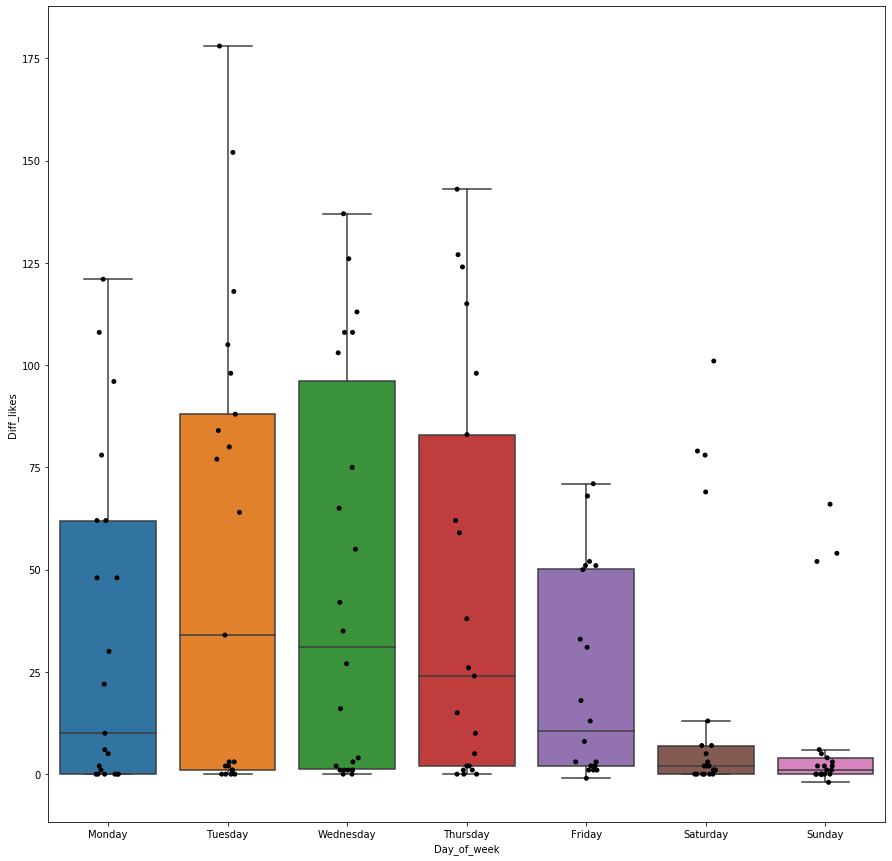

In [5]:
plt.figure(figsize=(15,15))
sns.boxplot(x="Day_of_week", y="Diff_likes", data=photo_day_ID_diff_likes, showfliers=False);
sns.stripplot(x="Day_of_week", y="Diff_likes", data=photo_day_ID_diff_likes, jitter=True, color='black');

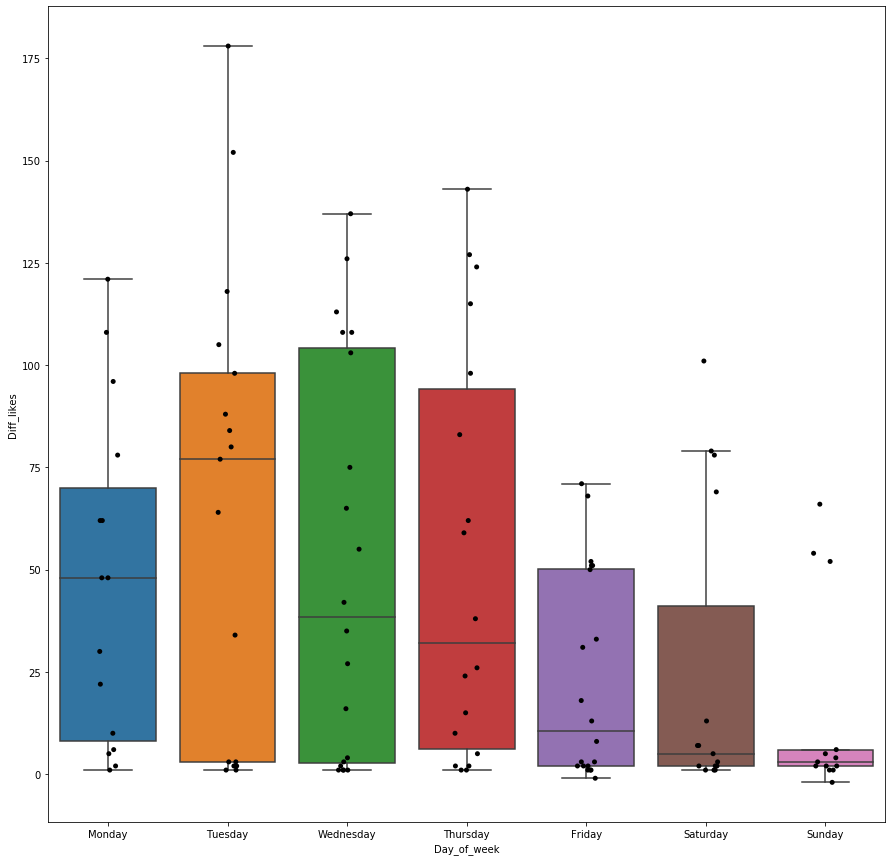

In [78]:
plt.figure(figsize=(15,15))
sns.boxplot(x="Day_of_week", y="Diff_likes", data=photo_day_ID_diff_likes_no0, showfliers=False);
sns.stripplot(x="Day_of_week", y="Diff_likes", data=photo_day_ID_diff_likes_no0, jitter=True, color='black');

In [16]:
week_days = photo_day_diff_likes['Day_of_week'].unique()

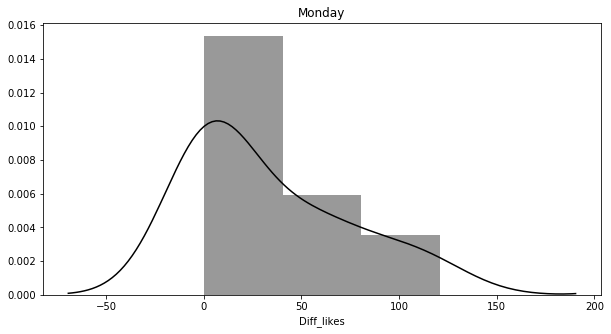

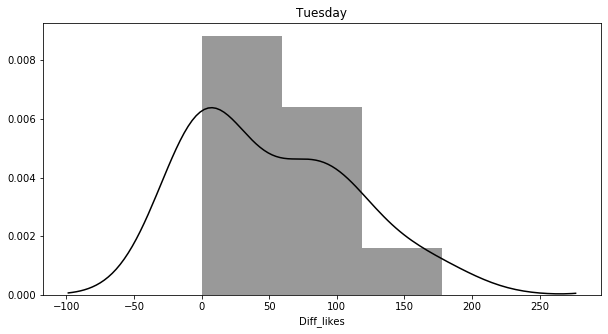

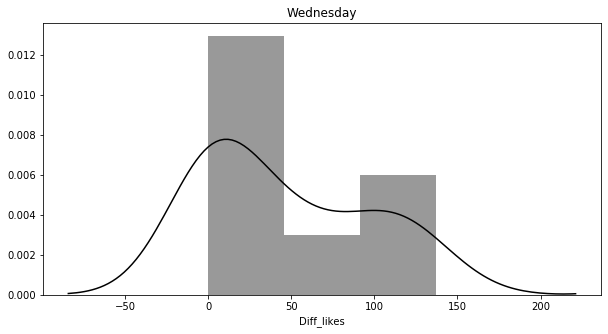

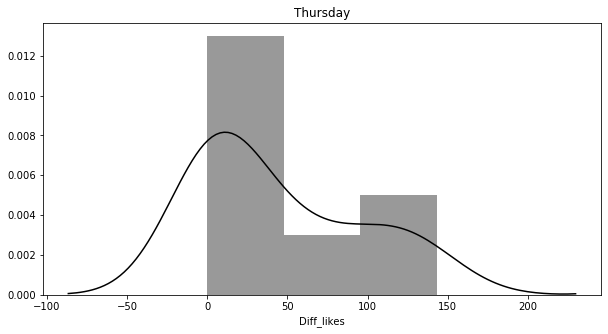

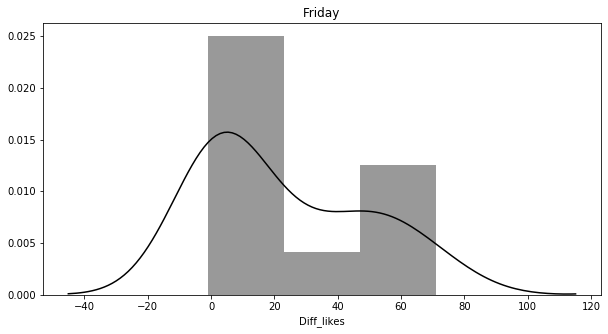

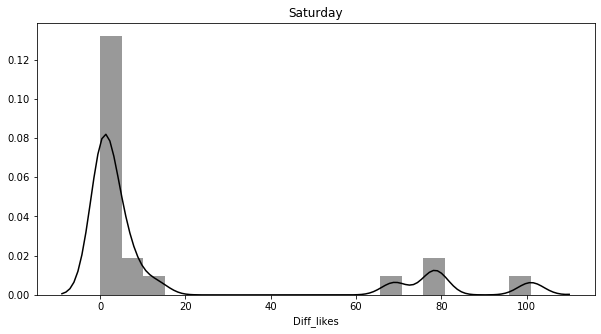

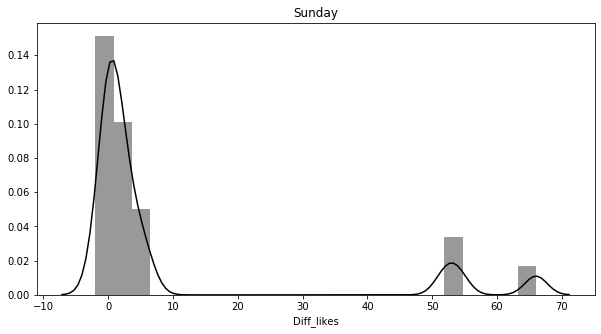

In [20]:
for week_day in week_days:
    plt.figure(figsize=(10,5))
    sns.distplot(photo_day_ID_diff_likes.loc[photo_day_ID_diff_likes.Day_of_week == week_day]['Diff_likes'],
                 color="black").set_title(week_day);

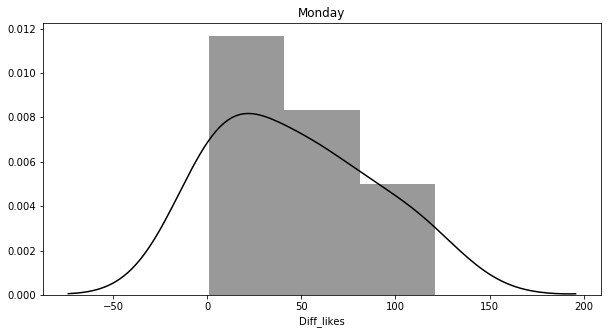

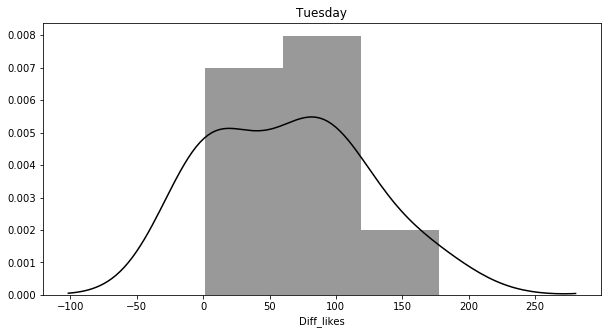

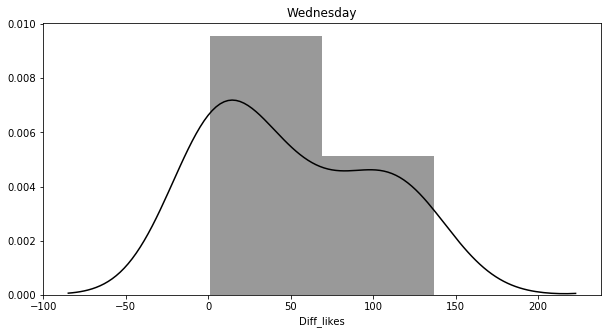

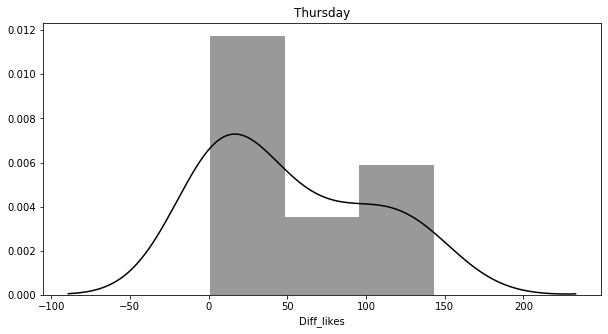

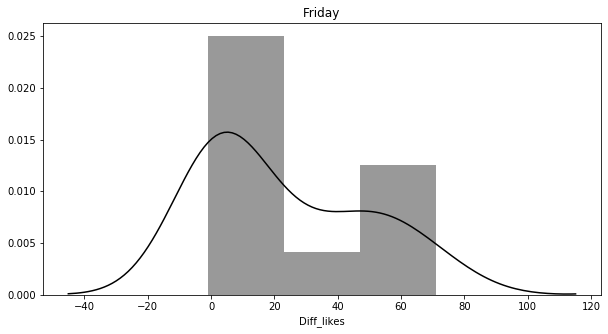

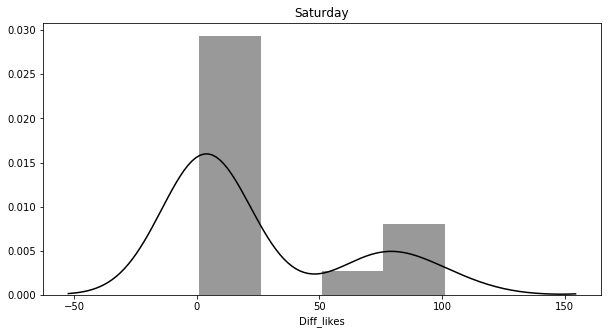

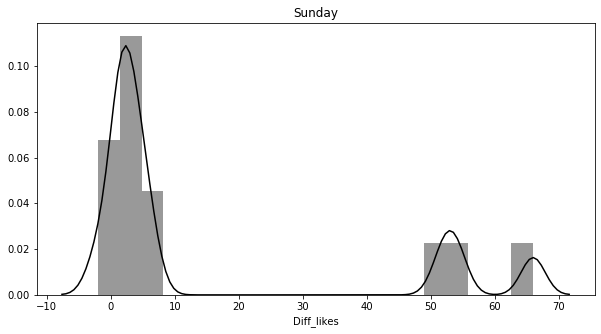

In [22]:
for week_day in week_days:
    plt.figure(figsize=(10,5))
    sns.distplot(photo_day_ID_diff_likes_no0.loc[photo_day_ID_diff_likes_no0.Day_of_week == week_day]['Diff_likes'],
                 color="black").set_title(week_day);

#### Statistics

In [81]:
photo_day_ID_diff_likes.groupby('Day_of_week', sort=False).describe()

Diff_likes                                                     
                 count       mean        std  min   25%   50%    75%    max
Day_of_week                                                                
Monday            21.0  33.285714  40.115013  0.0  0.00  10.0  62.00  121.0
Tuesday           21.0  51.904762  57.084941  0.0  1.00  34.0  88.00  178.0
Wednesday         22.0  46.500000  49.117692  0.0  1.25  31.0  96.00  137.0
Thursday          21.0  44.523810  50.211173  0.0  2.00  24.0  83.00  143.0
Friday            20.0  23.000000  25.269078 -1.0  2.00  10.5  50.25   71.0
Saturday          21.0  17.666667  32.441229  0.0  0.00   2.0   7.00  101.0
Sunday            21.0   9.333333  20.310917 -2.0  0.00   1.0   4.00   66.0

In [82]:
photo_day_ID_diff_likes_no0.groupby('Day_of_week', sort=False).describe()

Diff_likes                                                      
                 count       mean        std  min   25%   50%     75%    max
Day_of_week                                                                 
Monday            15.0  46.600000  40.424179  1.0  8.00  48.0   70.00  121.0
Tuesday           17.0  64.117647  56.932946  1.0  3.00  77.0   98.00  178.0
Wednesday         20.0  51.150000  49.154188  1.0  2.75  38.5  104.25  137.0
Thursday          18.0  51.944444  50.576061  1.0  6.25  32.0   94.25  143.0
Friday            20.0  23.000000  25.269078 -1.0  2.00  10.5   50.25   71.0
Saturday          15.0  24.733333  36.279602  1.0  2.00   5.0   41.00  101.0
Sunday            13.0  15.076923  24.366854 -2.0  2.00   3.0    6.00   66.0

#### Tests

In [83]:
kruskal(*[group["Diff_likes"].values for _, group in photo_day_ID_diff_likes[['Diff_likes', 'Day_of_week']].groupby(['Day_of_week'])])

KruskalResult(statistic=15.803166818763096, pvalue=0.014850361971594882)

In [6]:
photo_day_ID_diff_likes_ph = sp.posthoc_dunn(photo_day_ID_diff_likes[['Diff_likes', 'Day_of_week']], val_col='Diff_likes',
                group_col='Day_of_week',
                p_adjust='holm-sidak').replace(-1,1)
reindex_ph(photo_day_ID_diff_likes_ph, my_key=days, sort=False).style.applymap(two_colors)

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Monday,1,0.983155,0.981645,0.983155,0.999634,0.981645,0.494229
Tuesday,0.983155,1,0.999634,0.999634,0.983155,0.546244,0.0721611
Wednesday,0.981645,0.999634,1,0.999634,0.983155,0.466649,0.0410647
Thursday,0.983155,0.999634,0.999634,1,0.983155,0.533646,0.0662475
Friday,0.999634,0.983155,0.983155,0.983155,1,0.973999,0.466649
Saturday,0.981645,0.546244,0.466649,0.533646,0.973999,1,0.983155
Sunday,0.494229,0.0721611,0.0410647,0.0662475,0.466649,0.983155,1


In [8]:
kruskal(*[group["Diff_likes"].values for _, group in photo_day_ID_diff_likes_no0[['Diff_likes', 'Day_of_week']].groupby(['Day_of_week'])])

KruskalResult(statistic=13.411256979596356, pvalue=0.0369506430385137)

In [9]:
photo_day_ID_diff_likes_no0_ph = sp.posthoc_dunn(photo_day_ID_diff_likes_no0[['Diff_likes', 'Day_of_week']], val_col='Diff_likes',
                group_col='Day_of_week',
                p_adjust='holm-sidak').replace(-1,1)
reindex_ph(photo_day_ID_diff_likes_no0_ph, my_key=days, sort=False).style.applymap(two_colors)

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Monday,1,0.999583,0.999583,0.999583,0.707376,0.739228,0.41675
Tuesday,0.999583,1,0.997897,0.999583,0.426705,0.547589,0.180278
Wednesday,0.999583,0.997897,1,0.999583,0.732398,0.785902,0.438929
Thursday,0.999583,0.999583,0.999583,1,0.644709,0.732398,0.349175
Friday,0.707376,0.426705,0.732398,0.644709,1,0.999583,0.997897
Saturday,0.739228,0.547589,0.785902,0.732398,0.999583,1,0.997897
Sunday,0.41675,0.180278,0.438929,0.349175,0.997897,0.997897,1
